In [5]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

import statsmodels.api as sm
import itertools

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/armansarjou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/armansarjou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Collection

For Finance Data

In [177]:
import yfinance as yf

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = yf.download("CL=F", start="2020-10-18", end="2020-10-30", interval = "5m")
data.to_csv('CLF_data.csv')

For Twitter Datasets

In [ ]:
#Followed the following tutorial: https://www.youtube.com/watch?v=dvAurfBB6Jk to carry out web scraping
#This applies to all of the following Data collection steps for twitter web scraping
import tweepy
import webbrowser
import time

In [ ]:
callback_uri = 'oob'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key, callback_uri)
redirect_url = auth.get_authorization_url()

In [ ]:
webbrowser.open(redirect_url)

In [ ]:
user_pin_input = input("Input the Pin: ")

In [ ]:
user_pin_input

In [ ]:
auth.get_access_token(user_pin_input)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
me = api.me()
me.screen_name

In [ ]:
filename = "query_climate_emergency.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "climate emergency -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()

In [ ]:
filename = "query_climate_change.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "climate change -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()

In [ ]:
filename = "query_environmental.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "environmental -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()

In [ ]:
filename = "query_our_planet.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "our planet -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()

In [ ]:
filename = "query_paris_agreement.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "paris agreement -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()

In [ ]:
filename = "query_global_warming.csv"
f = open(filename, "w")
headers = ("index,tweet,time,likes,retweets,user,geo,\n")

f.write(headers)
#geocode = "51.5,0.12,40km"
query = "global warming -filter:retweets"
for i, j in enumerate(tweepy.Cursor(api.search, q= query, tweet_mode='extended').items(50000)):
    f.write(str(i) + "," + j.full_text.replace(",", " ").replace("\n", " ").replace('"'," ") + "," + str(j.created_at) + "," + str(j.favorite_count) +  "," + str(j.retweet_count) + "," + str(j.user.id) + "," + str(j.user.location) + "\n")

f.close()



As can be seen, some preprocessing was done during the collection process where spaces, commas and speech marks were removed from the tweets to allow smooth writing into CSV

## Data Preprocessing

First the edited web scraped data is read basic data wrangling and cleaning is perform to prepare data for analysis

In [8]:
q_climate_change = pd.read_csv('query_climate_change_edit.csv')
q_climate_emergency = pd.read_csv('query_climate_emergency_edit.csv')
q_environmental = pd.read_csv('query_environmental_edit.csv')
q_paris_agreement = pd.read_csv('query_paris_agreement_edit.csv')
q_global_warming = pd.read_csv('query_global_warming_edit.csv')
q_our_planet = pd.read_csv('query_our_planet_edit.csv')

In [9]:
#use the DF index instead of one calculated by pandas 
q_climate_change = q_climate_change.set_index('index')
q_climate_emergency = q_climate_emergency.set_index('index')
q_environmental = q_environmental.set_index('index')
q_paris_agreement = q_paris_agreement.set_index('index')
q_global_warming = q_global_warming.set_index('index')
q_our_planet = q_our_planet.set_index('index')

Remove special symbols from the tweets

In [10]:
def clean_tweet(text): #Read in a column and remove special characters
    try:
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    except:
        return None

In [11]:
#Create a new column with cleaned text
q_climate_change['clean_text'] = q_climate_change['tweet'].apply(clean_tweet)
q_climate_emergency['clean_text'] = q_climate_emergency['tweet'].apply(clean_tweet)
q_environmental['clean_text'] = q_environmental['tweet'].apply(clean_tweet)
q_paris_agreement['clean_text'] = q_paris_agreement['tweet'].apply(clean_tweet)
q_global_warming['clean_text'] = q_global_warming['tweet'].apply(clean_tweet)
q_our_planet['clean_text'] = q_our_planet['tweet'].apply(clean_tweet)

Calculate Sentiment for the data using TextBlob Sentiment Analysis Function. Used a Try and Except here to allow the input of NaN values where Sentiment Analysis cannot be done

In [12]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity #Calculating the sentiment 
    except:
        "NAN"

In [13]:
#Adding sentiment column for all DFs
q_climate_change['sentiment'] = q_climate_change['clean_text'].apply(sentiment_calc)
q_climate_emergency['sentiment'] = q_climate_emergency['clean_text'].apply(sentiment_calc)
q_environmental['sentiment'] = q_environmental['clean_text'].apply(sentiment_calc)
q_paris_agreement['sentiment'] = q_paris_agreement['clean_text'].apply(sentiment_calc)
q_global_warming['sentiment'] = q_global_warming['clean_text'].apply(sentiment_calc)
q_our_planet['sentiment'] = q_our_planet['clean_text'].apply(sentiment_calc)

In [14]:
#Reformatting the Time stamps to make resampling possible
q_climate_change['ts'] = pd.to_datetime(q_climate_change['time'], format="%Y/%m/%d %H:%M:%S")
q_climate_emergency['ts'] = pd.to_datetime(q_climate_emergency['time'], format="%Y/%m/%d %H:%M:%S")
q_environmental['ts'] = pd.to_datetime(q_environmental['time'], format="%Y/%m/%d %H:%M:%S")
q_paris_agreement['ts'] = pd.to_datetime(q_paris_agreement['time'], format="%Y/%m/%d %H:%M:%S")
q_global_warming['ts'] = pd.to_datetime(q_global_warming['time'], format="%Y/%m/%d %H:%M:%S")
q_our_planet['ts'] = pd.to_datetime(q_our_planet['time'], format="%Y/%m/%d %H:%M:%S")
print(q_our_planet['ts'].head(10)) #To check it works

index
23459   2020-10-22 19:43:50
21746   2020-10-23 03:17:50
30380   2020-10-20 18:01:13
16393   2020-10-24 05:37:51
1543    2020-10-28 18:37:55
29474   2020-10-20 23:22:26
32446   2020-10-20 02:05:49
29590   2020-10-20 22:29:35
11505   2020-10-25 18:43:22
10140   2020-10-26 06:39:37
Name: ts, dtype: datetime64[ns]


Generate the Latitude and Longitude Columns using the Geocoder OpenStreetMap API. This was quite an involved process as this required the resulting column to be split and turned into a numeric value.

In [15]:
import geocoder
import geopy

In [ ]:
def getlatlong(loc):
    try:
        g = geocoder.osm(loc)
        return g.latlng
    except:
        "NAN"

In [21]:
print(sum(q_our_planet['geo'].isnull()))
print(sum(q_climate_change['geo'].isnull()))
print(sum(q_climate_emergency['geo'].isnull()))
print(sum(q_environmental['geo'].isnull()))
print(sum(q_paris_agreement['geo'].isnull()))
print(sum(q_global_warming['geo'].isnull()))

9556
14636
883
13259
1003
8874


In [ ]:
#Drop all rows with null values for geolocation so that spatial analysis can be done
q_our_planet = q_our_planet.dropna(subset = ['geo'])
q_climate_change = q_climate_change.dropna(subset = ['geo'])
q_climate_emergency = q_climate_emergency.dropna(subset = ['geo'])
q_environmental = q_environmental.dropna(subset = ['geo'])
q_paris_agreement = q_paris_agreement.dropna(subset = ['geo'])
q_global_warming = q_global_warming.dropna(subset = ['geo'])

In [ ]:
#Uses Geocoder to retrieve the Latitude and Longitude of all DataFrames... This takes ~8 hours
q_our_planet['geoloc'] = (q_our_planet['geo'].apply(getlatlong))
q_climate_change['geoloc'] = (q_climate_change['geo'].apply(getlatlong))
q_climate_emergency['geoloc'] = (q_climate_emergency[]'geo'].apply(getlatlong))
q_environmental['geoloc'] = (q_environmental['geo'].apply(getlatlong))
q_paris_agreement['geoloc'] = (q_paris_agreement['geo'].apply(getlatlong))
q_global_warming['geoloc'] = (q_global_warming['geo'].apply(getlatlong))

In [ ]:
#Drop rows where geocoder returned NaN values
q_our_planet = q_our_planet.dropna(subset = ['geoloc'])
q_climate_change = q_climate_change.dropna(subset = ['geoloc'])
q_climate_emergency = q_climate_emergency.dropna(subset = ['geoloc'])
q_environmental = q_environmental.dropna(subset = ['geoloc'])
q_paris_agreement = q_paris_agreement.dropna(subset = ['geoloc'])
q_global_warming = q_global_warming.dropna(subset = ['geoloc'])

In [6]:
q_environmental_geoloc = pd.read_csv('q_environmental_geoloc.csv')
q_global_warming_geoloc = pd.read_csv('q_global_warming_geoloc.csv')
q_climate_emergency_geoloc = pd.read_csv('q_climate_emergency_geoloc.csv')
q_paris_agreement_geoloc = pd.read_csv('q_paris_agreement_geoloc.csv')
q_climate_change_geoloc = pd.read_csv('q_climate_change_geoloc.csv')
q_our_planet_geoloc = pd.read_csv('q_our_planet_tsne_loc.csv')

In [7]:
#Returns Latitude and Longitude under one column as a vector... This can't be used so has to be split 
q_environmental_geoloc['geoloc']

0                 [1.3069105, 103.8561385]
1                  [60.5000209, 9.0999715]
2                 [-1.2832533, 36.8172449]
3               [47.5315625, -122.6384056]
4                  [46.0050102, 8.9520281]
                       ...                
32940    [53.45733965, -2.226958805052226]
32941             [12.8831063, 77.7501677]
32942            [22.5213807, 113.3656141]
32943            [22.5213807, 113.3656141]
32944             [35.845999, -86.3920452]
Name: geoloc, Length: 32945, dtype: object

In [8]:
#Splits the Longitude and Latitude into a new dataframe
lonlat = q_our_planet_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 
q_paris_agreement_cords = q_paris_agreement_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 
q_global_warming_cords = q_global_warming_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
q_climate_emergency_cords = q_climate_emergency_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
q_climate_change_cords = q_climate_change_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 
q_environmental_cords = q_environmental_geoloc['geoloc'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 

In [9]:
#Join the new Latitude and Longitude Columns onto the end of the DataFrame
q_our_planet_latlng = q_our_planet_geoloc.join(lonlat)
q_paris_agreement_latlng = q_paris_agreement_geoloc.join(q_paris_agreement_cords)
q_global_warming_latlng = q_global_warming_geoloc.join(q_global_warming_cords)
q_climate_emergency_latlng = q_climate_emergency_geoloc.join(q_climate_emergency_cords)
q_climate_change_latlng = q_climate_change_geoloc.join(q_climate_change_cords)
q_environmental_latlng = q_environmental_geoloc.join(q_environmental_cords)

In [10]:
#Remove Duplicate Tweets (including RTs) from the DataFrames
q_paris_agreement_latlng_nodup = q_paris_agreement_latlng.drop_duplicates(subset=['clean_text'])
q_environmental_latlng_nodup = q_environmental_latlng.drop_duplicates(subset=['clean_text'])
q_global_warming_latlng_nodup = q_global_warming_latlng.drop_duplicates(subset=['clean_text'])
q_climate_change_latlng_nodup = q_climate_change_latlng.drop_duplicates(subset=['clean_text'])
q_climate_emergency_latlng_nodup = q_climate_emergency_latlng.drop_duplicates(subset=['clean_text'])
q_our_planet_latlng_nodup = q_our_planet_latlng.drop_duplicates(subset=['clean_text'])

In [11]:
#Convert Latitude to a Numeric Column 
q_our_planet_latlng['Latitude'] = pd.to_numeric(q_our_planet_latlng['Latitude'])
q_environmental_latlng_nodup['Latitude'] = pd.to_numeric(q_environmental_latlng_nodup['Latitude'])
q_global_warming_latlng_nodup['Latitude'] = pd.to_numeric(q_global_warming_latlng_nodup['Latitude'])
q_climate_change_latlng_nodup['Latitude'] = pd.to_numeric(q_climate_change_latlng_nodup['Latitude'])
q_climate_emergency_latlng_nodup['Latitude'] = pd.to_numeric(q_climate_emergency_latlng_nodup['Latitude'])
q_paris_agreement_latlng_nodup['Latitude'] = pd.to_numeric(q_paris_agreement_latlng_nodup['Latitude'])

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

In [12]:
#Convert Longitude to a Numeric Column
q_our_planet_latlng['Longitude'] = pd.to_numeric(q_our_planet_latlng['Longitude'])
q_environmental_latlng_nodup['Longitude'] = pd.to_numeric(q_environmental_latlng_nodup['Longitude'])
q_global_warming_latlng_nodup['Longitude'] = pd.to_numeric(q_global_warming_latlng_nodup['Longitude'])
q_climate_change_latlng_nodup['Longitude'] = pd.to_numeric(q_climate_change_latlng_nodup['Longitude'])
q_climate_emergency_latlng_nodup['Longitude'] = pd.to_numeric(q_climate_emergency_latlng_nodup['Longitude'])
q_paris_agreement_latlng_nodup['Longitude'] = pd.to_numeric(q_paris_agreement_latlng_nodup['Longitude'])

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

Preparing the dataframes for each query for concatenation required removing duplicate tweets, add a new column called 'Query' to track what search query each tweet came from and then dropping duplicate tweets that may have been collected in more than one query.

In [13]:
#Prepare DataFrames for Concatenation by creating a new column called Query which contains the Search Query for each tweet
q_paris_agreement_latlng_nodup['Query'] = "Paris Agreement"
q_global_warming_latlng_nodup['Query'] = "Global Warming"
q_climate_emergency_latlng_nodup['Query'] = "Climate Emergency"
q_climate_change_latlng_nodup['Query'] = "Climate Change"
q_environmental_latlng_nodup['Query'] = "Environmental"
q_our_planet_latlng_nodup['Query'] = "Our Planet"

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [14]:
q_all_lnglat = pd.concat([q_paris_agreement_latlng_nodup, q_climate_change_latlng_nodup, q_climate_emergency_latlng_nodup, q_global_warming_latlng_nodup,q_environmental_latlng_nodup, q_our_planet_latlng_nodup], join="inner")

The resulting dataframe that is close to being ready for analysis can be seen below! This dataframe has around 100,000 tweets (even after duplicates are dropped). Columns 'Words', 'msgdate_h' and 'sentiment_clean' were created during initial data exploration and testing on the raw data... The process of tokenization in this way and resampling will be shown below

In [15]:
q_all_lnglat.head(10) #The resulting dataframe that is close to being ready for analysis! 

Unnamed: 0                   ts  \
0           1  2020-10-22 18:41:06   
1           4  2020-10-22 23:47:10   
2           5  2020-10-23 13:12:06   
3           6  2020-10-20 19:35:13   
4           7  2020-10-23 02:24:33   
5           8  2020-10-27 03:34:43   
6          10  2020-10-23 02:24:06   
7          11  2020-10-28 15:40:00   
8          12  2020-10-24 18:22:26   
9          15  2020-10-28 03:49:03   

                                               tweet                 time  \
0   ACT WITH ACCOUNTABILTY WITH THE PARIS AGREEME...  2020-10-22 18:41:06   
1   I will rejoin the Paris climate agreement on ...  2020-10-22 23:47:10   
2   If the @UN didn't exist  we would need to cre...  2020-10-23 13:12:06   
3   It is important to highlight the crucial role...  2020-10-20 19:35:13   
4   Look at China  how filthy it is. Look at Russ...  2020-10-23 02:24:33   
5   New Zealand has come out very strongly in sup...  2020-10-27 03:34:43   
6   We have so many different programs  we love t...  2020-10-23 02:24:06   
7   We have to have federal leadership and we hav...  2020-10-28 15:40:00   
8   well  i won't go on. i'm sorry  i get a littl...  2020-10-24 18:22:26   
9  - he doesnt know of the reversal of the isolat...  2020-10-28 03:49:03   

   likes  retweets          user              geo                geo2  \
0    2.0       1.0  1.205202e+18        Nederland                 NaN   
1    5.0       0.0  8.369717e+17         Santiago               Chile   
2    3.0       1.0  1.224359e+18             Bonn             Germany   
3    0.0       0.0  1.174792e+18           London             England   
4    5.0       0.0  2.823782e+09  FEMA Region X🌲💀                 NaN   
5    7.0       2.0  1.928144e+08         Canberra           Australia   
6   29.0       0.0  1.735344e+08         New York                  NY   
7   10.0       6.0  5.362533e+08    United States                 NaN   
8    0.0       0.0  2.286853e+07         New York                 NaN   
9    0.0       0.0  8.756933e+17            Perth   Western Australia   

                                          clean_text  sentiment   msgdate_h  \
0  ACT WITH ACCOUNTABILTY WITH THE PARIS AGREEMEN...   0.000000   90.685000   
1  I will rejoin the Paris climate agreement on d...   0.031250   95.786111   
2  If the didn t exist we would need to create it...   0.400000  109.201667   
3  It is important to highlight the crucial role ...   0.125000   43.586944   
4  Look at China how filthy it is Look at Russia ...  -0.304762   98.409167   
5  New Zealand has come out very strongly in supp...   0.213764  195.578611   
6  We have so many different programs we love the...   0.120000   98.401667   
7  We have to have federal leadership and we have...   0.000000  231.666667   
8  well i won t go on i m sorry i get a little ex...  -0.078125  138.373889   
9  he doesnt know of the reversal of the isolatio...  -0.008333  219.817500   

                                               words  sentiment_clean  \
0  ['act', 'accountabilty', 'commission', 'voteth...         0.000000   
1  ['rejoin', 'climate', 'day', 'one', 'biden', '...         0.062500   
2  ['exist', 'would', 'need', 'create', 'sdgs', '...         0.400000   
3  ['important', 'highlight', 'crucial', 'role', ...         0.125000   
4  ['look', 'china', 'filthy', 'look', 'russia', ...        -0.304762   
5  ['new', 'zealand', 'come', 'strongly', 'suppor...         0.047273   
6  ['many', 'different', 'programs', 'love', 'env...         0.120000   
7  ['federal', 'leadership', 'leadership', 'state...         0.000000   
8  ['well', 'go', 'sorry', 'get', 'little', 'exci...        -0.104167   
9  ['doesnt', 'know', 'reversal', 'isolationist',...        -0.008333   

                              geoloc Latitude Longitude            Query  
0            [52.5001698, 5.7480821]  52.5002   5.74808  Paris Agreement  
1           [9.8694792, -83.7980749]  9.86948  -83.7981  Paris Agreement  
2               [50.735851, 7.100

In [16]:
#Remove Duplicates that may have come up in more than one query
q_all_latlng_nodup = q_all_lnglat.drop_duplicates(subset=['clean_text'])

# Tokenization, Lemmatization and Vectorizing text ready for analysis

In [17]:
df = pd.read_csv('q_all_latlng_nodup.csv') #Reading in the saved DataFrame that was produced above
#When reading in the CSV the tokenized columns are read in in the wrong format...
#Tokenization will be redone

In [18]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1']) #Dropping the unnecessarily produced columns

When carrying out the tokenization, we remove the stopwords so that these don't dominate the WordClouds we will produce in Data Exploration. Make all text lower case in order to make sure that Capitalised words aren't disruptive of analysis

In [19]:
def tweet_tokenize(tweet):
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.append('our')
    stopwords.append('planet')
    stopwords.append('climate')
    stopwords.append('change')
    stopwords.append('emergency')
    stopwords.append('paris')
    stopwords.append('agreement')
    stopwords.append('environmental')
    stopwords.append('global')
    stopwords.append('warming')
    stopwords.append('dtype')
    stopwords.append('FM')
    stopwords.append('ts')
    tweet = str(tweet).lower()
    tweet_tokens = word_tokenize(tweet)
    tokenized_words = [w for w in tweet_tokens if not w in stopwords]
    return tokenized_words

In [20]:
df['words_new'] = df['clean_text'].apply(tweet_tokenize)
#Retokenizing the text to prepare for analysis after reading in the CSV file

In [21]:
#Lemmatization using the Spacy Large English Library. This removes the endings of words
#to ensure that different forms of the same word are all counted

#Adapted from https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/
import spacy
nlp = spacy.load('en_core_web_lg')


# Make tokens a string again
df['lemma_sent'] = [' '.join(map(str, l)) for l in df['words_new']]

def lemmatizer(tweet):        
    sent = []
    doc = nlp(tweet)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df['lemma_token'] = (df['lemma_sent'].apply(lambda x: lemmatizer(x))) #use a Lambda function to pass cells through function 

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_lg' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [22]:
df['lemma_token_fin'] = df['lemma_token'].apply(tweet_tokenize)

In [23]:
df.head(10)

ts                                              tweet  \
0  2020-10-22 18:41:06   ACT WITH ACCOUNTABILTY WITH THE PARIS AGREEME...   
1  2020-10-22 23:47:10   I will rejoin the Paris climate agreement on ...   
2  2020-10-23 13:12:06   If the @UN didn't exist  we would need to cre...   
3  2020-10-20 19:35:13   It is important to highlight the crucial role...   
4  2020-10-23 02:24:33   Look at China  how filthy it is. Look at Russ...   
5  2020-10-27 03:34:43   New Zealand has come out very strongly in sup...   
6  2020-10-23 02:24:06   We have so many different programs  we love t...   
7  2020-10-28 15:40:00   We have to have federal leadership and we hav...   
8  2020-10-24 18:22:26   well  i won't go on. i'm sorry  i get a littl...   
9  2020-10-28 03:49:03  - he doesnt know of the reversal of the isolat...   

                  time  likes  retweets          user              geo  \
0  2020-10-22 18:41:06    2.0       1.0  1.205202e+18        Nederland   
1  2020-10-22 23:47:10    5.0       0.0  8.369717e+17         Santiago   
2  2020-10-23 13:12:06    3.0       1.0  1.224359e+18             Bonn   
3  2020-10-20 19:35:13    0.0       0.0  1.174792e+18           London   
4  2020-10-23 02:24:33    5.0       0.0  2.823782e+09  FEMA Region X🌲💀   
5  2020-10-27 03:34:43    7.0       2.0  1.928144e+08         Canberra   
6  2020-10-23 02:24:06   29.0       0.0  1.735344e+08         New York   
7  2020-10-28 15:40:00   10.0       6.0  5.362533e+08    United States   
8  2020-10-24 18:22:26    0.0       0.0  2.286853e+07         New York   
9  2020-10-28 03:49:03    0.0       0.0  8.756933e+17            Perth   

                 geo2                                         clean_text  \
0                 NaN  ACT WITH ACCOUNTABILTY WITH THE PARIS AGREEMEN...   
1               Chile  I will rejoin the Paris climate agreement on d...   
2             Germany  If the didn t exist we would need to create it...   
3             England  It is important to highlight the crucial role ...   
4                 NaN  Look at China how filthy it is Look at Russia ...   
5           Australia  New Zealand has come out very strongly in supp...   
6                  NY  We have so many different programs we love the...   
7                 NaN  We have to have federal leadership and we have...   
8                 NaN  well i won t go on i m sorry i get a little ex...   
9   Western Australia  he doesnt know of the reversal of the isolatio...   

   sentiment  ...                                              words  \
0   0.000000  ...  ['act', 'accountabilty', 'commission', 'voteth...   
1   0.031250  ...  ['rejoin', 'climate', 'day', 'one', 'biden', '...   
2   0.400000  ...  ['exist', 'would', 'need', 'create', 'sdgs', '...   
3   0.125000  ...  ['important', 'highlight', 'crucial', 'role', ...   
4  -0.304762  ...  ['look', 'china', 'filthy', 'look', 'russia', ...   
5   0.213764  ...  ['new', 'zealand', 'come', 'strongly', 'suppor...   
6   0.120000  ...  ['many', 'different', 'programs', 'love', 'env...   
7   0.000000  ...  ['federal', 'leadership', 'leadership', 'state...   
8  -0.078125  ...  ['well', 'go', 'sorry', 'get', 'little', 'exci...   
9  -0.008333  ...  ['doesnt', 'know', 'reversal', 'isolationist',...   

  sentiment_clean                             geoloc   Latitude   Longitude  \
0        0.000000            [52.5001698, 5.7480821]  52.500170    5.748082   
1        0.062500           [9.8694792, -83.7980749]   9.869479  -83.798075   
2        0.400000               [50.735851, 7.10066]  50.735851    7.100660   
3        0.125000           [51.5073219, -0.1276474]  51.507322   -0.127647   
4       -0.304762  [47.7907535, -122.23618971693712]  47.790754 -122.236190   
5        0.047273         [-35.2975906, 149.1012676] -35.297591  149.101268   
6        0.120000          [40.7127281, -74.0060152]  40.712728  -74.006015   
7        0.000000         [39.7837304, -100.4458825]  39.783730 -100.445882   
8       -0.10416

# Initial Data Exploration 

At this stage, it would be good to look at what sort of distributions my Twitter Dataset has. It would also be good to look at the Stock Price Data that was scraped to plan how this will be joined to the twitter dataset

In [24]:
stock = pd.read_csv('CLF_data.csv')

In [25]:
stock['ts'] = pd.to_datetime(stock['Datetime'], format="%Y/%m/%d %H:%M:%S") #Reformatting Datetime 
stock['ts'] = stock['ts'].dt.tz_convert(None) #Converting the timezone of the stock data in line with Twitter Data as it originally came in Eastern Time
stock.set_index(stock['ts'], inplace=True) #Setting Timestamp as index 
df['ts'] = pd.to_datetime(df['ts'], format="%Y/%m/%d %H:%M:%S") 
df.set_index(df['ts'], inplace=True)

In [26]:
q_pa = df[df['Query'] == "Paris Agreement"]
q_gw = df[df['Query'] == "Global Warming"]
q_e = df[df['Query'] == "Environmental"]
q_cc = df[df['Query'] == "Climate Change"]
q_ce = df[df['Query'] == "Climate Emergency"]
q_op = df[df['Query'] == "Our Planet"]

#Sorting the twitter dataset back into seperate dataframes

In [27]:
print("CC:", q_cc.ts.min(), q_cc.ts.max())
print("CE:", q_ce.ts.min(), q_ce.ts.max())
print("PA:", q_pa.ts.min(), q_pa.ts.max())
print("E:", q_e.ts.min(), q_e.ts.max())
print("GW:", q_gw.ts.min(), q_gw.ts.max())
print("OP:", q_op.ts.min(), q_op.ts.max())
#Looking and the time periods of each dataset 

CC: 2020-10-25 02:30:43 2020-10-28 21:43:45
CE: 2020-10-19 15:02:07 2020-10-28 21:27:49
PA: 2020-10-19 23:43:42 2020-10-29 09:58:12
E: 2020-10-22 20:05:32 2020-10-29 02:30:11
GW: 2020-10-20 10:21:46 2020-10-29 10:32:28
OP: 2020-10-19 23:40:20 2020-10-29 07:02:29


We can see that the min and max dates of each data set are different. This will skew the dataset so should cut the dataset down by date
From this I'd like to only use the 7 days from 22-19 October 2020.
Considering not using Climate Change data due to very short timeframe that will skew dataset

In [28]:
#Taken from Visual Analytics, Lab 3
df_count_hourly = df.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()
plt.savefig('tweets_per_hour_all.jpeg', format='jpeg')
like_count_hourly = df.resample('H').sum()[['likes']]
retweet_count_hourly = df.resample('H').sum()[['retweets']]


plt.figure(figsize = (20, 10))
plt.xlabel('time')
plt.ylabel('Log(Number of Engagement)')
plt.title('evolution of the number of engagements every hour')
plt.plot(like_count_hourly.index, np.log(like_count_hourly.values.flatten()+1), label='likes');
plt.plot(retweet_count_hourly.index, np.log(retweet_count_hourly.values.flatten()+1), label='retweets');
plt.legend(loc='upper right')
plt.show()
plt.savefig('engagements_per_hour_all.eps', format='eps')


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Clear that due to the time period of the datasets, overall tweet count is skewed (look at how number of tweets increases towards later dates.
There is a large Anomaly on the 23rd... Would be good to observe whether this is present in all DataFrames.
Likes and Retweets have been Log transformed due to the difference between the largest and smallest values... This makes it possible to see the data on one plot

Before manipulating the DataFrame with all queries, I would like to inspect the evolution of number of tweets for the individual queries.

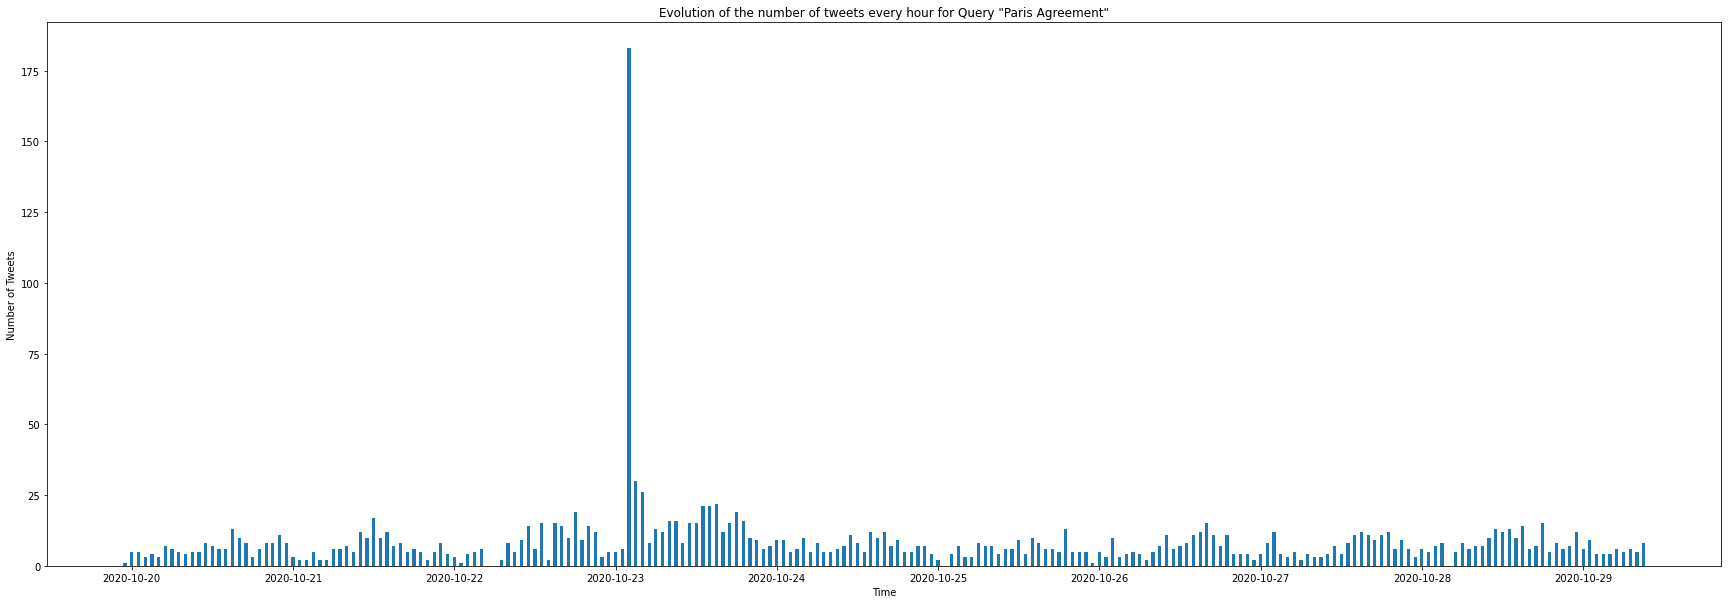

In [29]:
#Taken from Visual Analytics, Lab 3
df_count_hourly = q_pa.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Paris Agreement"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

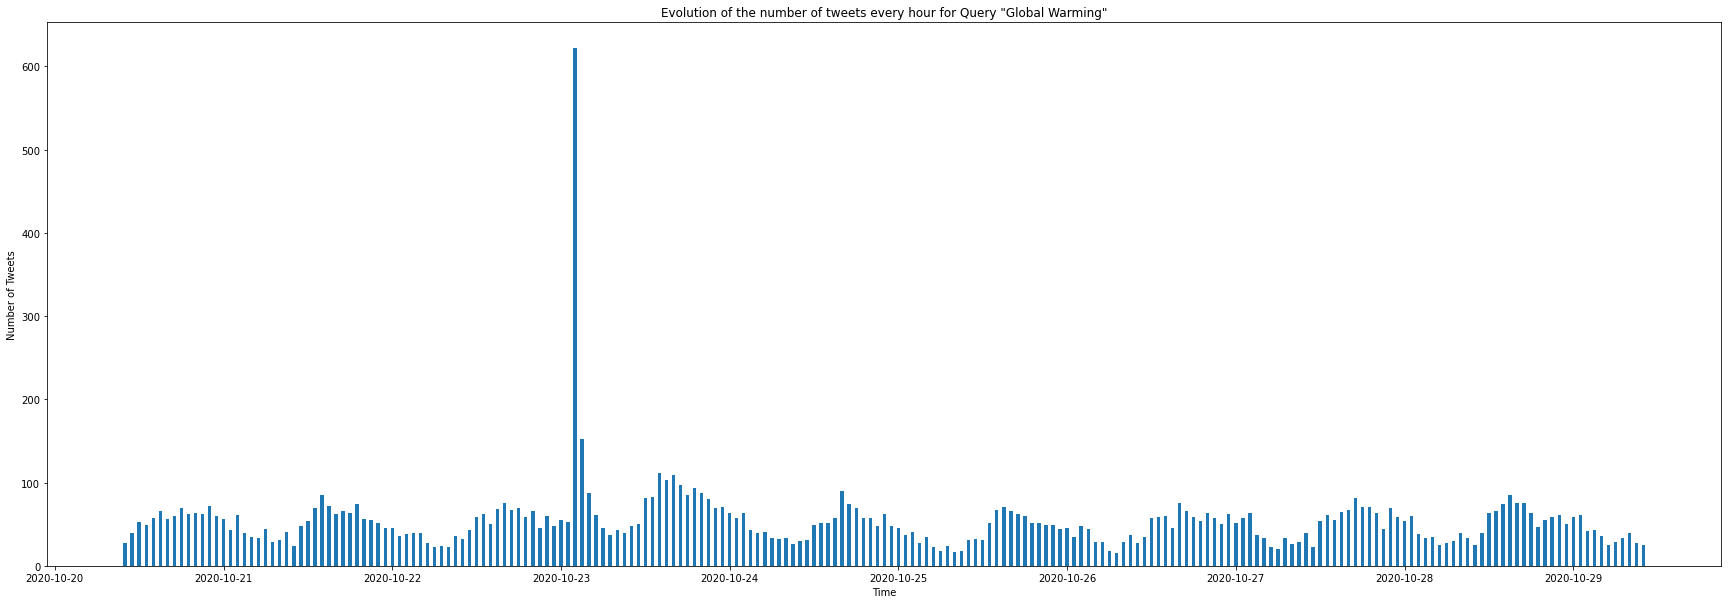

In [30]:
df_count_hourly = q_gw.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Global Warming"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

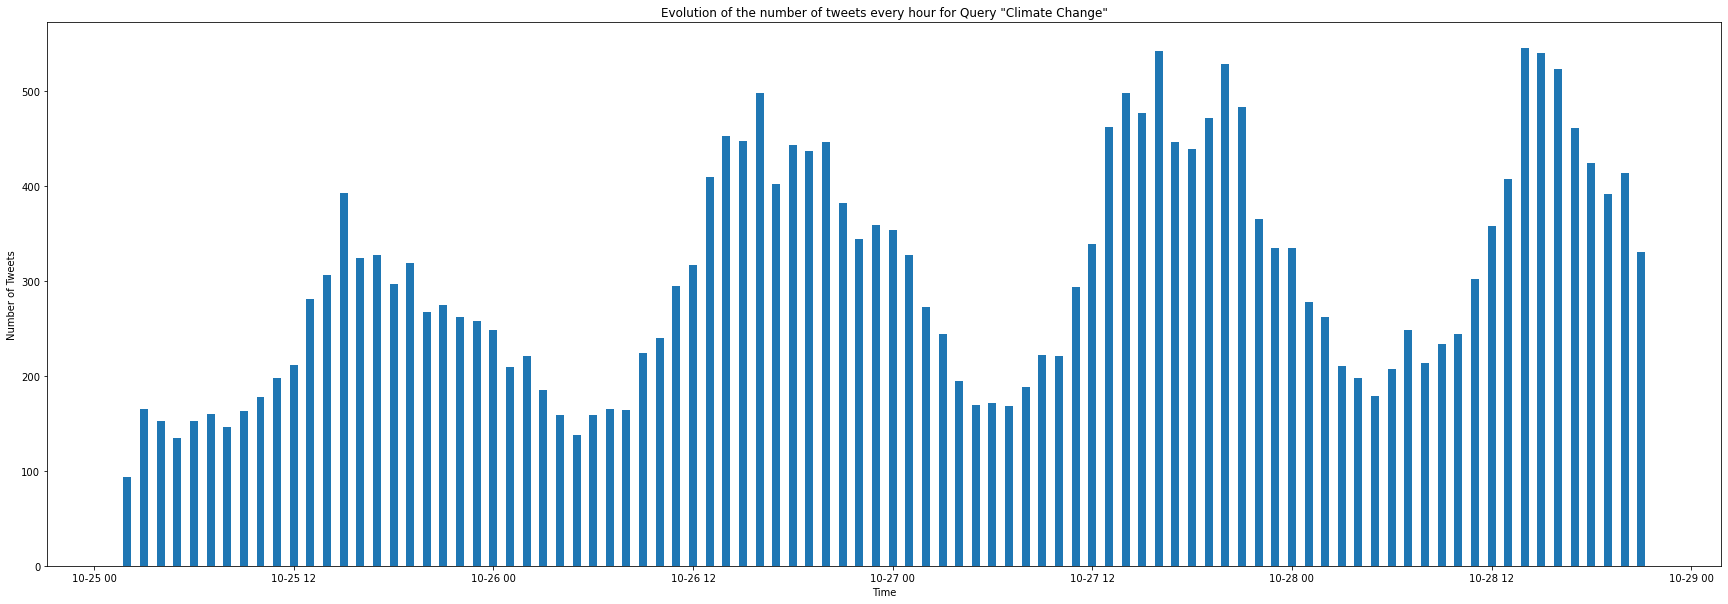

In [31]:
df_count_hourly = q_cc.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Climate Change"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

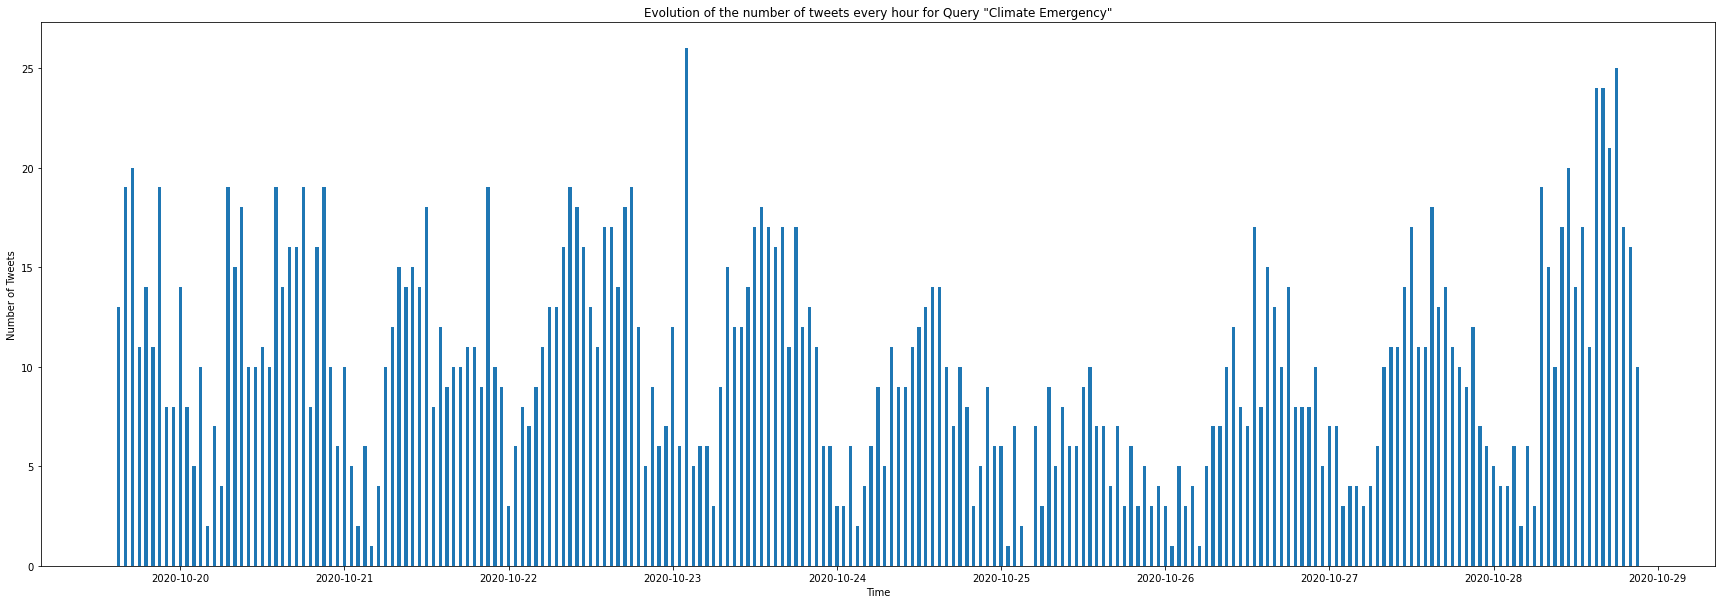

In [32]:
df_count_hourly = q_ce.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Climate Emergency"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

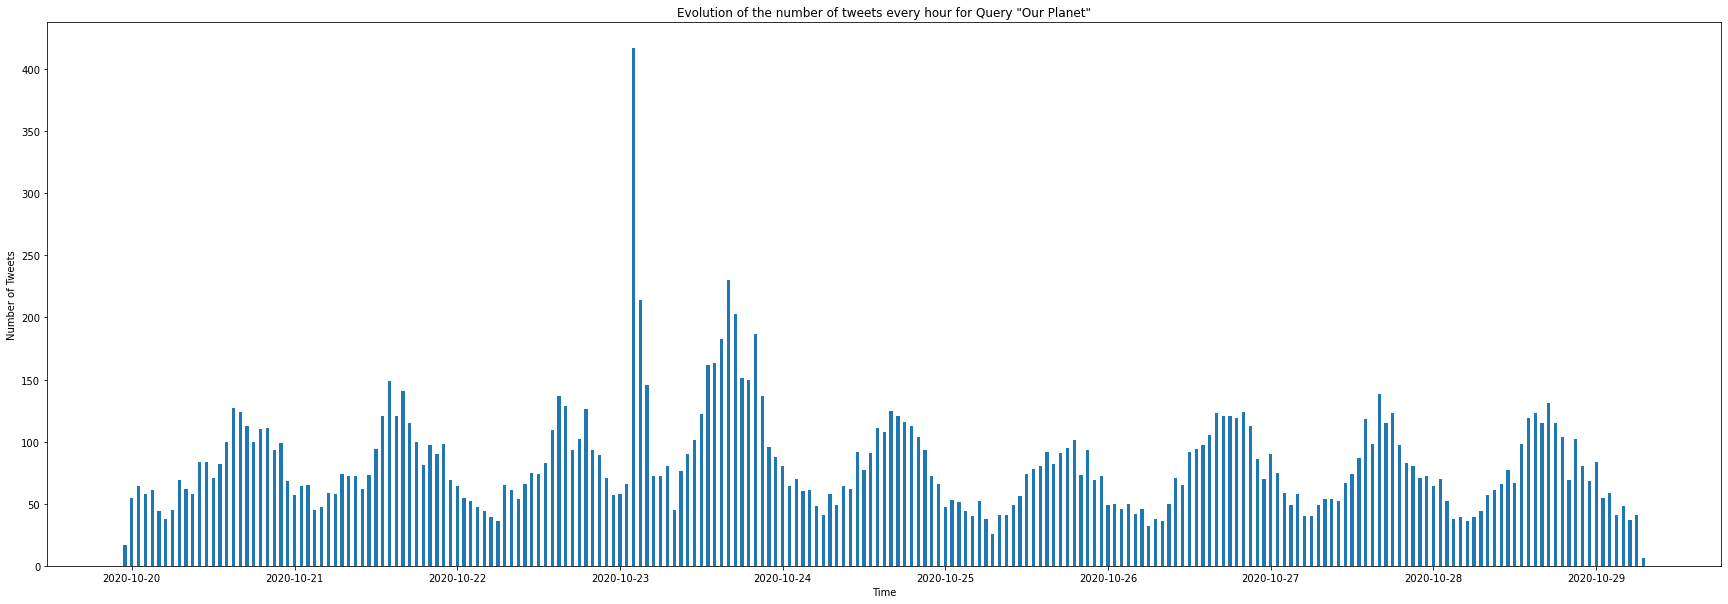

In [33]:
df_count_hourly = q_op.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Our Planet"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

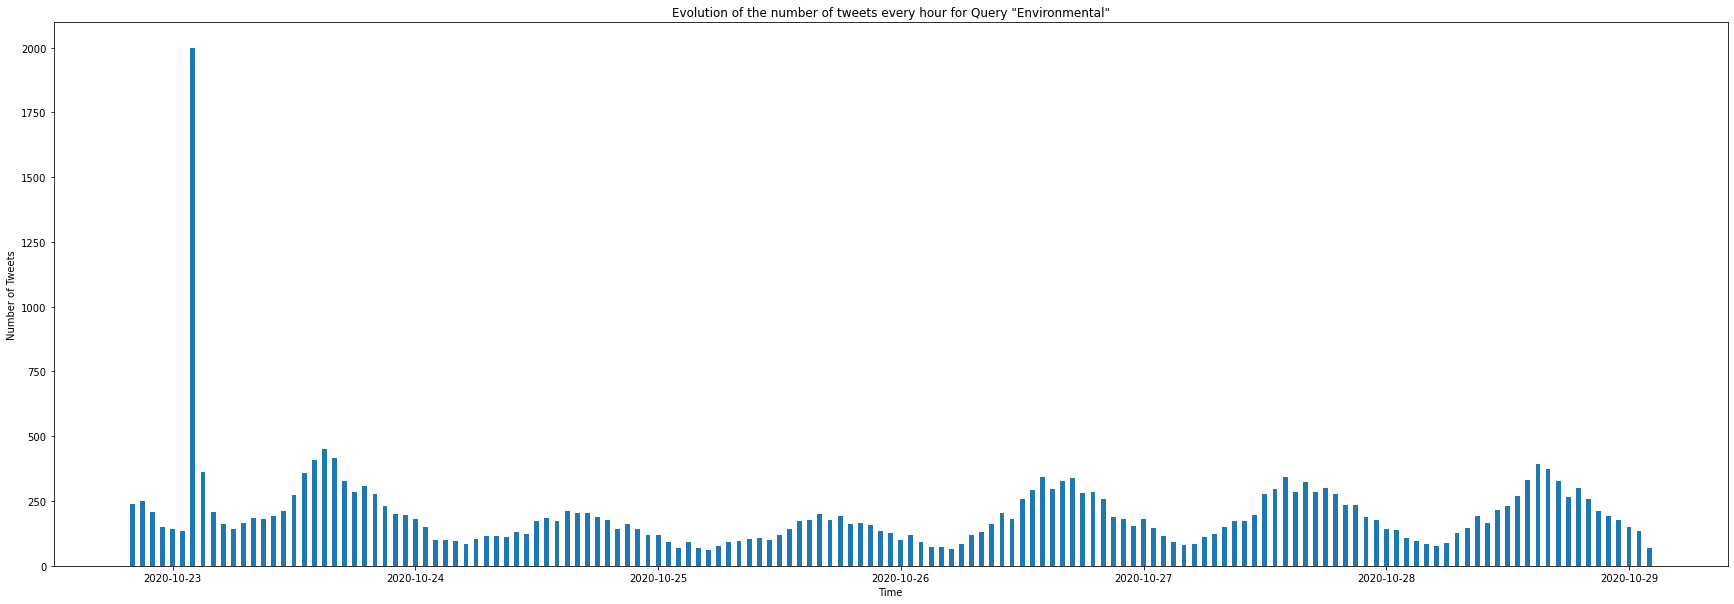

In [34]:
df_count_hourly = q_e.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour for Query "Environmental"')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

# Findings from the Evolution of number of tweets for each Query

The data all show similar patterns with a large spike on the 23rd of October 2020 and a cyclical pattern to number of tweets per hour. This would be explained by a Day and Night cycle where most people tweet during the day (on BST). The climate Emergency query looks slightly different but this may be due to this phrasing being relatively new which means that it is used a lot less than was previously anticipated

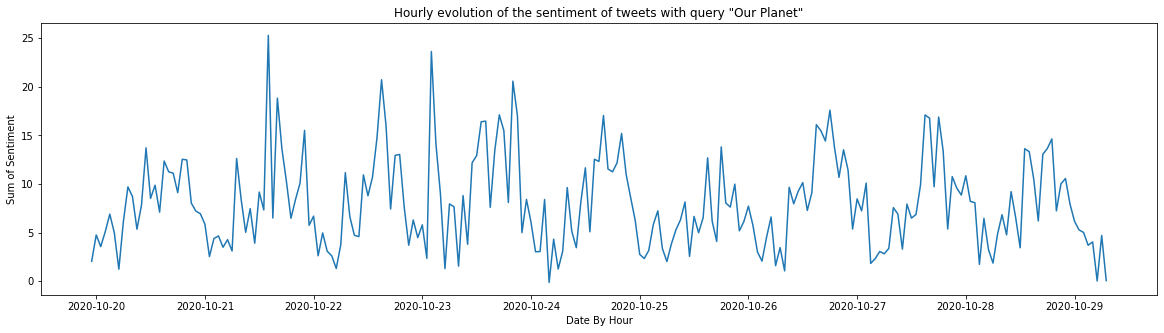

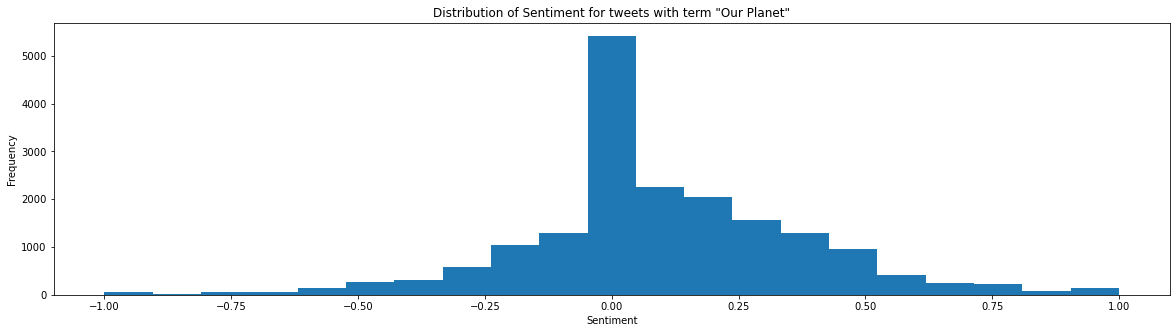

In [42]:
polarity_sum_hourly = q_op.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_op.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Our Planet"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Our Planet"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_op['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Our Planet"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

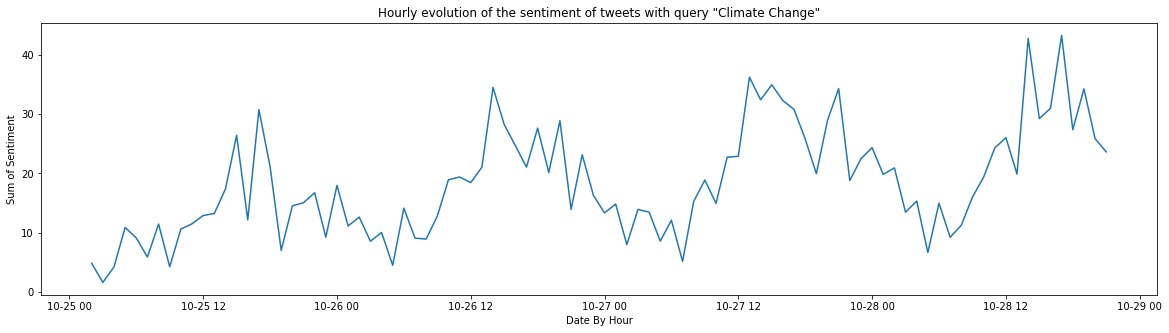

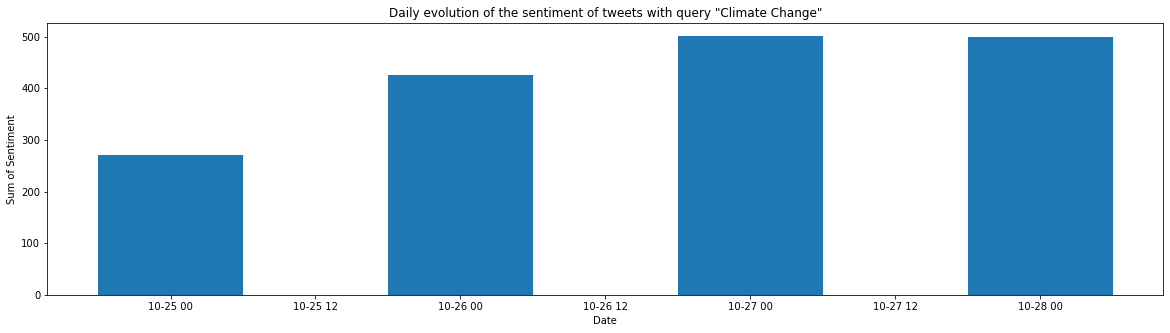

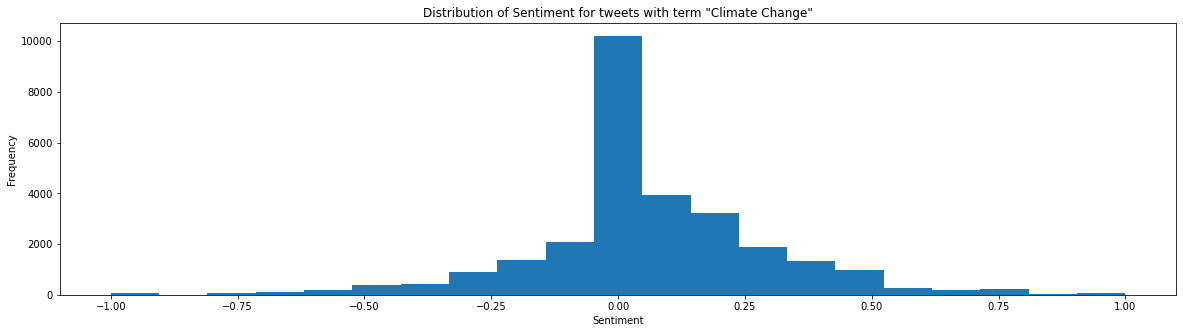

In [43]:
polarity_sum_hourly = q_cc.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_cc.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Climate Change"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Climate Change"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_cc['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Climate Change"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

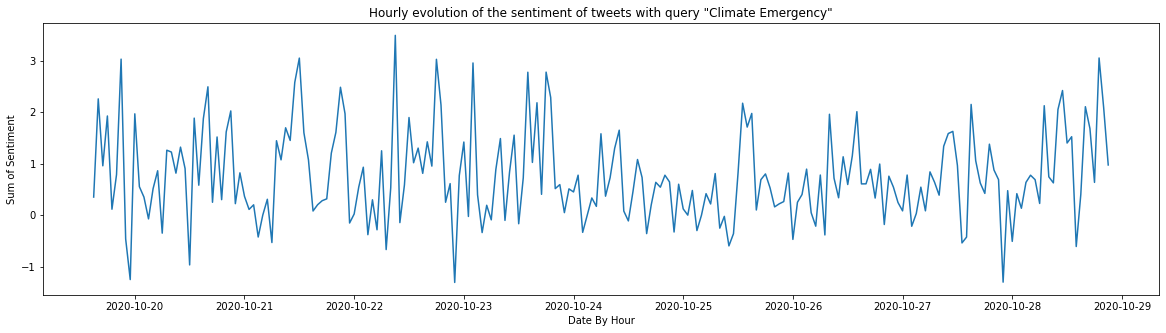

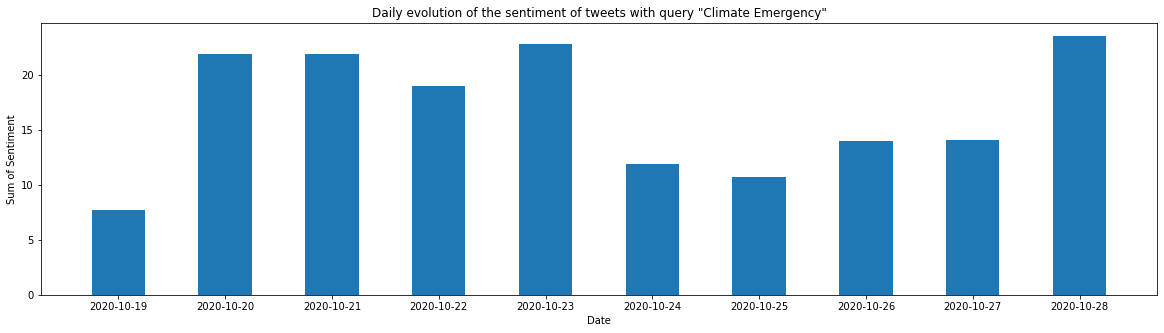

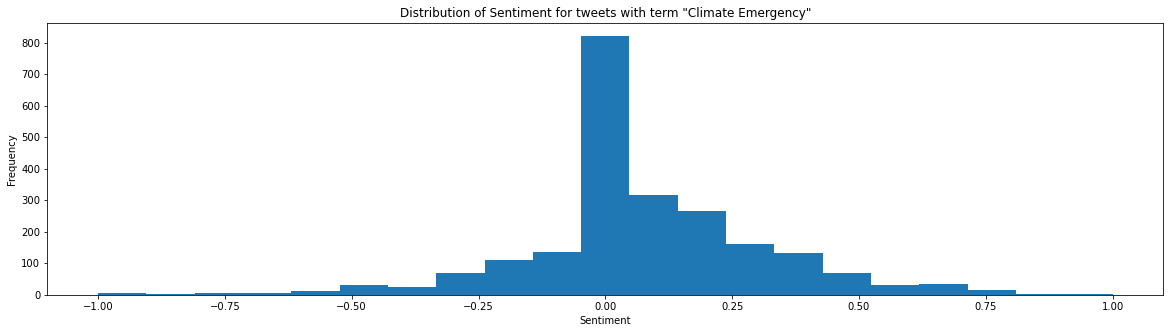

In [44]:
polarity_sum_hourly = q_ce.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_ce.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Climate Emergency"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Climate Emergency"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_ce['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Climate Emergency"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

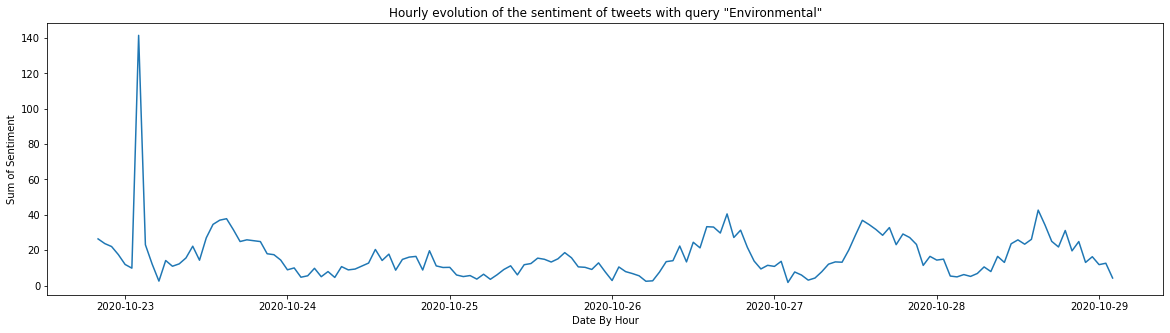

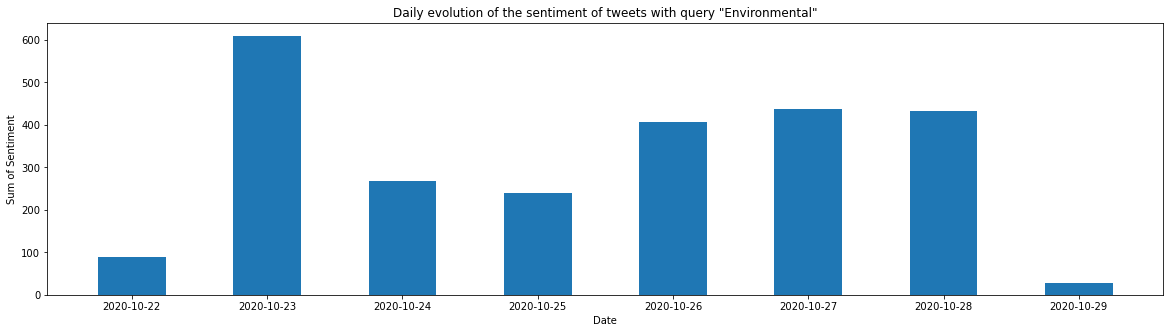

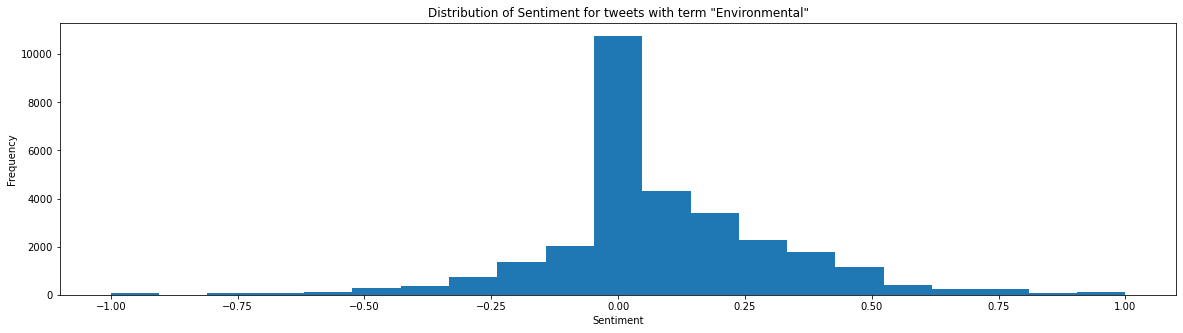

In [46]:
polarity_sum_hourly = q_e.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_e.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Environmental"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Environmental"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_e['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Environmental"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

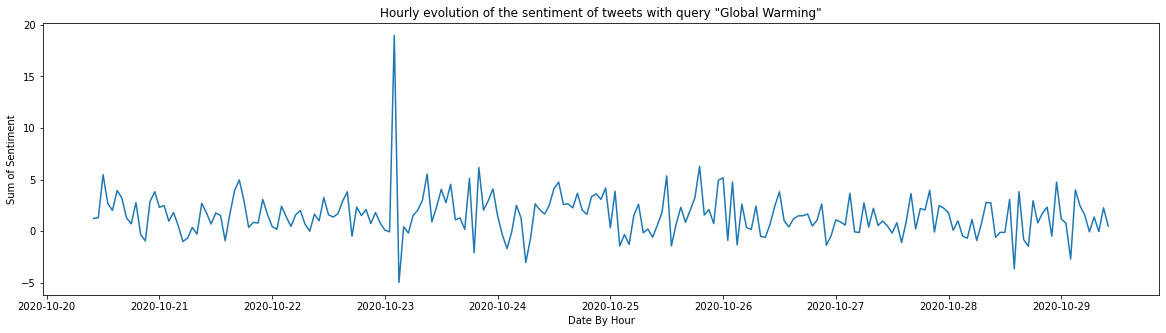

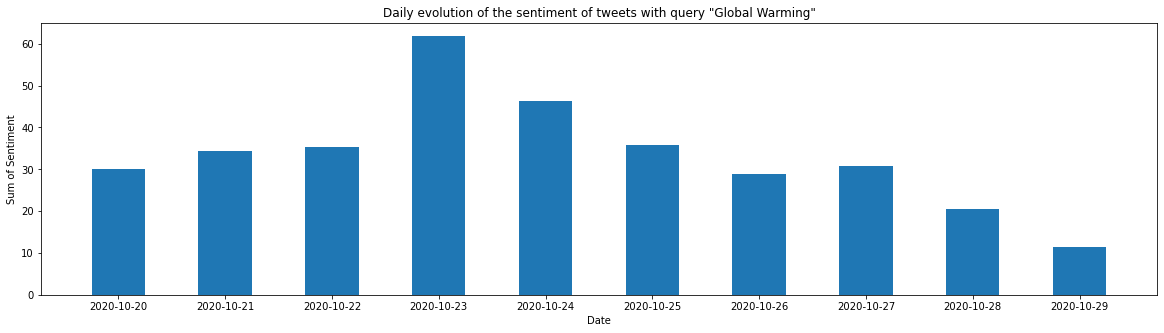

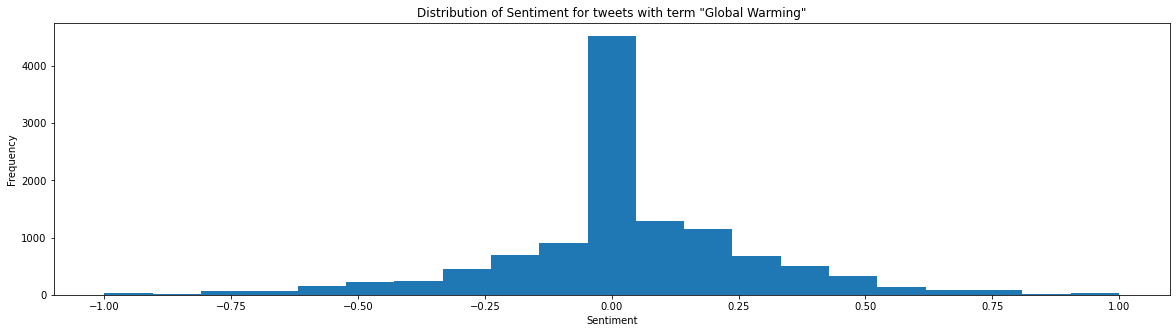

In [47]:
polarity_sum_hourly = q_gw.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_gw.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Global Warming"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Global Warming"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_gw['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Global Warming"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

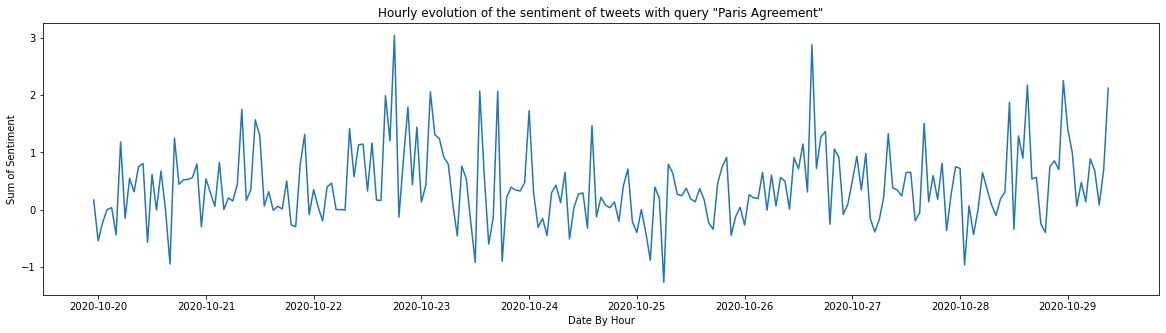

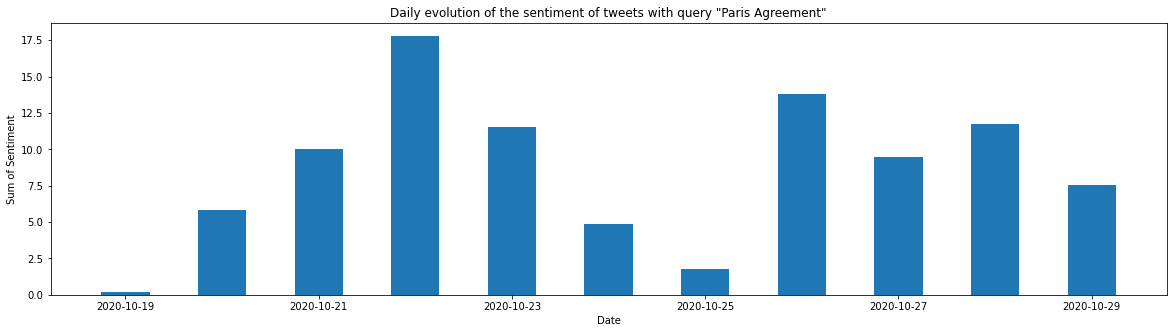

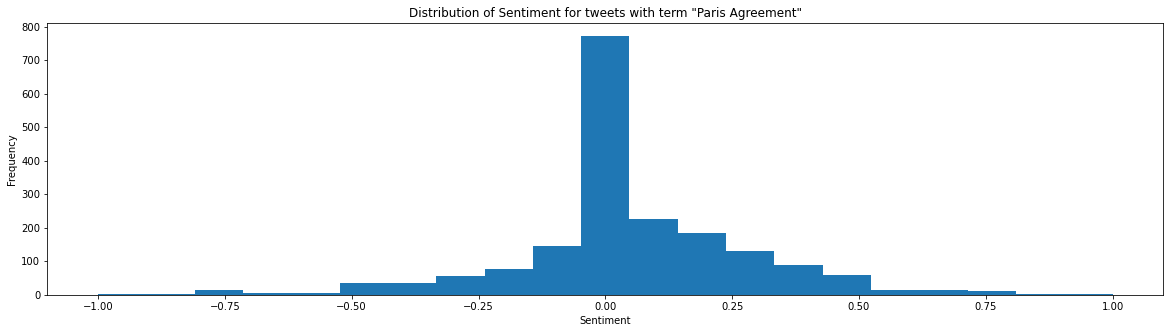

In [48]:
polarity_sum_hourly = q_pa.resample('H').sum()[['sentiment_clean']] #Resampling and plotting hourly sum of sentiment 
polarity_sum_daily = q_pa.resample('D').sum()[['sentiment_clean']] #Resampling and plotting daily sum of sentiment

plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Sum of Sentiment')
plt.title('Hourly evolution of the sentiment of tweets with query "Paris Agreement"')
plt.plot(polarity_sum_hourly.index, polarity_sum_hourly.values.flatten());
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('Date')
plt.ylabel('Sum of Sentiment')
plt.title('Daily evolution of the sentiment of tweets with query "Paris Agreement"')
plt.bar(polarity_sum_daily.index, polarity_sum_daily.values.flatten(), width = 0.5);
plt.show()

plt.figure(figsize = (20, 5))
plt.hist(q_pa['sentiment_clean'], bins=21)
plt.title('Distribution of Sentiment for tweets with term "Paris Agreement"')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Findings from the Sentiment Plots

While plotting these distributions showing how the sum of sentiment varies hourly and daily may seem unnecessary, they show firstly that for all queries, most tweets are very close to neutral. This is important when trying to understand attitudes towards climate. The cyclical nature of the sum of sentiment for some of the queries (such as for the query Environmental) indicates that sum of sentiment can be a function of the number of tweets. It would therefore be more useful to analyse the sentiment per tweet for each hour or 5 minute period. 

# WordClouds For Each Query 

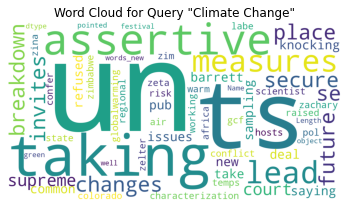

In [49]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_cc['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "Climate Change"')
plt.axis("off")
plt.show()
#Emphasis on assertive measure... Small mention of China and Policy here as well 

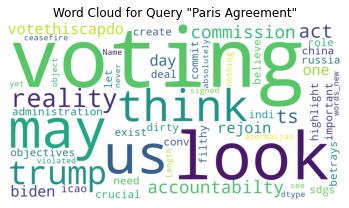

In [50]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_pa['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "Paris Agreement"')
plt.axis("off")
plt.show()

#Understandably, this Query is much much more political!

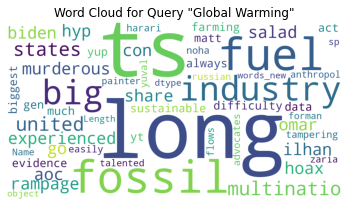

In [51]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_gw['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "Global Warming"')
plt.axis("off")
plt.show()

#More conventionally associated terms like fossil fuels... Big focus on energy

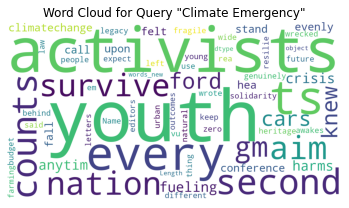

In [52]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_ce['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "Climate Emergency"')
plt.axis("off")
plt.show()
#Big Meniton of Youth! 

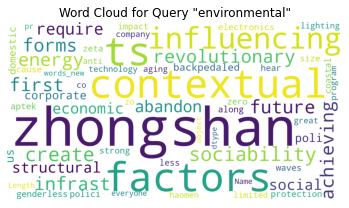

In [53]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_e['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "environmental"')
plt.axis("off")
plt.show()
#Zhongshan is a Province of China... A bit more about social justice here 

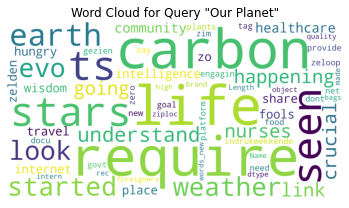

In [54]:
wordcloud = WordCloud(width = 1500, height = 800, background_color ='white').generate(str(q_op['words_new']))
plt.imshow(wordcloud)
plt.title('Word Cloud for Query "Our Planet"')
plt.axis("off")
plt.show()

#Bigger emphasis on the natural world here 

# Findings From Word Clouds

From the word Clouds we can see there are distinctly different words and, by proxy, topics that come up in these datasets. From what I see, the main ones are: 
- The Natural World 
- Fossil Fuels and Energy
- Social Justic
- Political


During my analysis, I have also plotted these Word Clouds for the positive and negative sentiment tweets (while filtering out the neutral tweets). This showed that there is huge variation in the topics that are perceived positively and negatively. Most negative sentiment came from tweets which included words about pollution and damaging the natural world and positive tweets generally included tweets about collective action. Political terms often appeared on both negative and positive word clouds. This included political figures like Joe Biden... This is expected as Politics can be polarising in a population

# Investigating the Outlier on the 23/10/2020

In [55]:
import datetime
d_lower = np.datetime64('2020-10-22')
d_upper = np.datetime64('2020-10-29')
#Setting upper and lower dates for my dataframe deduced from my plots of the evolution of tweets per hour

In [56]:
q_date = df[(df['ts'] >=d_lower) & (df['ts'] < d_upper)]
q_date.shape
#Filtered out around 10,000 tweets

(83876, 21)

In [57]:
q_date_filt = q_date[(q_date['Query'] == "Paris Agreement") | (q_date['Query'] == "Global Warming") | (q_date['Query'] == "Climate Emergency") | (q_date['Query'] == "Environmental") | (q_date['Query'] == "Our Planet")]
#Filtered out the Climate Change Dataset

In [58]:
df_count_hourly = q_date_filt.resample('H').count()[['tweet']]

plt.figure(figsize = (30, 10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every hour ')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);
plt.show()

#Much better balance in dataset! Large Outlier on 23rd which needs to be observed...

Below the Aggregation and resampling of the dataset is done... The columns that are produced can be seen in the report. This is done in intervals of 5 minutes as this is the same intervals in the Stock Market Data

In [59]:
df_agg = q_date_filt.resample('5T').agg({'likes': [sum, np.std, np.mean], 'retweets': [sum, np.std, np.mean], 'sentiment_clean': [sum,np.std,np.mean], 'lemma_token': ' - '.join, 'tweet': 'count', 'Latitude': [np.mean, np.std], 'Longitude': [np.mean, np.std]})

In [60]:
df_agg

likes                        retweets             \
                        sum         std       mean      sum        std   
ts                                                                       
2020-10-22 00:00:00   117.0   14.617082   9.750000     12.0   2.256304   
2020-10-22 00:05:00    92.0   31.291258  13.142857      6.0   2.267787   
2020-10-22 00:10:00    15.0    2.377929   1.363636      1.0   0.301511   
2020-10-22 00:15:00    27.0    5.578978   3.375000     14.0   2.659216   
2020-10-22 00:20:00   170.0   65.986867  28.333333     57.0  23.270153   
...                     ...         ...        ...      ...        ...   
2020-10-28 23:35:00    62.0    8.443856   2.818182     10.0   1.503243   
2020-10-28 23:40:00    16.0    1.833750   1.142857      9.0   1.150728   
2020-10-28 23:45:00    32.0    1.957055   1.777778     10.0   1.041618   
2020-10-28 23:50:00    44.0    2.653614   1.333333     10.0   0.809508   
2020-10-28 23:55:00  2299.0  459.842906  99.956522    386.0  74.882306   

                               sentiment_clean                      \
                          mean             sum       std      mean   
ts                                                                   
2020-10-22 00:00:00   1.000000        0.203274  0.130278  0.016939   
2020-10-22 00:05:00   0.857143        0.390480  0.278179  0.055783   
2020-10-22 00:10:00   0.090909        0.559028  0.165343  0.050821   
2020-10-22 00:15:00   1.750000        0.365774  0.132936  0.045722   
2020-10-22 00:20:00   9.500000        0.197083  0.206044  0.032847   
...                        ...             ...       ...       ...   
2020-10-28 23:35:00   0.454545        3.414777  0.208383  0.155217   
2020-10-28 23:40:00   0.642857        0.369607  0.337142  0.026400   
2020-10-28 23:45:00   0.555556        1.247554  0.266574  0.069309   
2020-10-28 23:50:00   0.303030        5.237790  0.256641  0.158721   
2020-10-28 23:55:00  16.782609        3.570960  0.218534  0.155259   

                                                           lemma_token tweet  \
                                                                  join count   
ts                                                                             
2020-10-22 00:00:00  actually expend energy anxious truly r rd - 1 ...    12   
2020-10-22 00:05:00  american political structure constitutionally ...     7   
2020-10-22 00:10:00  playlist even anymore haha maybe make dj type ...    11   
2020-10-22 00:15:00  usa powerful force solar system - fossil fuel ...     8   
2020-10-22 00:20:00  selon gpes ocean rebellion mission de navires ...     6   
...                                                                ...   ...   
2020-10-28 23:35:00  private investigator hire adani secretly photo...    22   
2020-10-28 23:40:00  lot provoke -PRON- interested common world rel...    14   
2020-10-28 23:45:00  complexion perfection lightweight tinted moist...    18   
2020-10-28 23:50:00  cyborg christmas big shit show fucking hate an...    33   
2020-10-28 23:55:00  u bishops trump pope francis support holy fath...    23   

                      Latitude             Longitude              
                          mean        std       mean         std  
ts                                                                
2020-10-22 00:00:00  41.053821   6.174903 -66.560571   77.331972  
2020-10-22 00:05:00  37.936864   8.395880 -78.631889   36.106626  
2020-10-22 00:10:00  33.439312  20.306579 -42.567266   93.631990  
2020-10-22 00:15:00  22.620776  36.836837 -38.439041  116.156567  
2020-10-22 00:20:00  33.435111  28.763380 -19.878876   89.002765  
...                        ...        ...        ...         ...  
2020-10-28 23:35:00  36.693529  15.252424 -53.791769   70.979199  
2020-10-28 23:40:00  28.167252  27.743971 -22.855869  102.769517  
2020-10-28 23:45:00  19.092873  30.461528 -23.735060  111.919144  
2020-10-28 23:50:00  19.195181  34.101759  -7.426924  105.673560  
2020-10-28 2

In [61]:
df_agg_outlier = df_agg[df_agg['tweet', 'count'] == 1023]
#This outlier is at 9pm... lets plot the word cloud... The outlier was found by finding the max number of tweets per hour

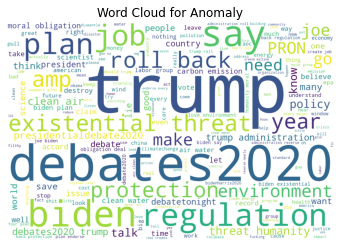

In [62]:
wordcloud = WordCloud(width = 1500, height = 1000, background_color ='white').generate((df_agg_outlier['lemma_token', 'join'][0]))
plt.imshow(wordcloud)
plt.title('Word Cloud for Anomaly')
plt.axis("off")
plt.show()

#This is in fact the US Presidential Debate on 23rd October at 9pm ET(3am BST) !

# Findings 

Quite Clearly the tweet is about the US Presidential Debate on 23rd October at 9pm ET (3am BST). This 5 minute interval is at 2:55am BST.

As this would dominate all of my results if kept in, the outlier was removed by filering out intervals that had tweet counts greater than 100 every 5 minutes

In [63]:
df_agg_nooutlier = df_agg[df_agg['tweet', 'count']<100]
#df_agg_nooutlier
#To remove mass events like this for analysis 
#df_fmins_nooutlier = df_fmins[df_fmins['tweet']<20]

In [64]:
df_count_hourly = df_agg_nooutlier.resample('H').sum()[['tweet']]


plt.figure(figsize = (20, 5))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every Hour')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02)

plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('time')
plt.ylabel('Number of Engagement')
plt.title('Evolution of the number of engagements every Hour')
plt.plot(df_agg_nooutlier.index, df_agg_nooutlier['sentiment_clean','sum'], label='sum');
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize = (20, 5))
plt.xlabel('time')
plt.ylabel('standard deviation')
plt.title('Evolution of the standard deviation every Hour')
plt.plot(df_agg_nooutlier.index, df_agg_nooutlier['sentiment_clean','std'], label='retweets');
plt.legend(loc='upper right')
plt.show()


The Dataset is much more balanced now and is ready for Unsupervised Topic Modelling. When the number of engagements every hour is plotted beneath the number of tweets per hour it is clear that there is correlation between the two.

# Investigating the Spatial Distribution of the Twitter Dataset 

In [65]:
#Taken from Visual Analytics Lab 3
import folium
from folium.plugins import HeatMap
xmm=(q_date_filt.Longitude.min()+q_date_filt.Longitude.max())/2
ymm=(q_date_filt.Latitude.min()+q_date_filt.Latitude.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=2, width=1000,height=1000)
hm_wide = HeatMap(list(zip(q_date_filt.Latitude.values, q_date_filt.Longitude.values)), 
                  min_opacity=0.9,
                  radius=3, blur=5, 
                  max_zoom=1)
hmap.add_child(hm_wide)

Interacting with this Map shows that the data is varied around the world and could be, to some extent, representative of the Global Middle Class. Within the UK there is a highest density within London whereas in the US there is a highest density of Tweets in New York, Chicago and Los Angeles. 

There is a high density of tweets coming from the Phillipines and from India which is to be noted for Asia. Unfortunately, almost no tweets are sampled from Russia or many parts of Northern Africa. This is concerning as these are often populations which are most at danger to climate related risk.


# Unsupervised Topic Modelling Using Latent Dirichlet Allocation (LDA)

In [66]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(
    analyzer='word',       
    min_df=500,# minimum number of occurences of a word 
    token_pattern='[a-zA-Z0-9]{3,}',# number of characters of each word > 3
    max_features=3000,# max number of unique words
    )
data_matrix = vectorizer.fit_transform(df_agg_nooutlier['lemma_token','join'])

In [67]:
lda_model = LatentDirichletAllocation(
n_components=3, # Number of topics
learning_method='online',
random_state=100,       
n_jobs = -1)  # Use all available CPUs
lda_output = lda_model.fit_transform(data_matrix)

In [68]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
0     -1015.700562  1338.981201       1        1  45.157410
2      -387.996002  -373.316162       2        1  42.591009
1     -2184.745605   -60.565800       3        1  12.251582, topic_info=       Term         Freq        Total Category  logprob  loglift
111    life  2346.000000  2346.000000  Default  30.0000  30.0000
112    like  3472.000000  3472.000000  Default  29.0000  29.0000
140  people  4092.000000  4092.000000  Default  28.0000  28.0000
45    david   739.000000   739.000000  Default  27.0000  27.0000
201   watch  1092.000000  1092.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
199    want   333.437832  2130.603631   Topic3  -4.6325   0.2448
85     help   326.273598  2052.577507   Topic3  -4.6542   0.2604
113    live   297.804746  1849.385579   Topic3  -4.7455   0.2733
74   future   300.426386  2115.945417   Topic3  -4.7367   0.1475
206    work   302.657074  2392.084709   Topic3  -4.7293   0.0322

[189 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.213220    2020
0         2  0.708439    2020
0         3  0.077624    2020
2         1  0.283126  action
2         2  0.647012  action
...     ...       ...     ...
209       2  0.422784    year
209       3  0.079940    year
210       1  0.654375     yes
210       2  0.203757     yes
210       3  0.141063     yes

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

After testing these were the best parameters that were found produced 3 topics which followed the themes of: 
- Politcs
- Public Health
- The Natural World 

This is what was expected after exploring the word clouds for each DataFrame. Therefore, this seems like a reasonable number of topics to use

Adjusted the Relevance metric to approximately 0.5 in the t-SNE visualization as this gave the most insightful results

In [69]:
df_lda_topic = pd.DataFrame(lda_output)

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
df_lda_topic['topic'] = lda_output.argmax(axis=1)
df_lda_topic.columns = ['LDA0', 'LDA1', 'LDA2', 'TOPIC' ]
#Take the output of the LDA analysis and add the probabilities and Topic to the DataFrame

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
df_lda_topic

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA0      LDA1      LDA2  TOPIC
0     0.446413  0.547507  0.006079      1
1     0.830028  0.162107  0.007865      0
2     0.083402  0.799138  0.117460      1
3     0.982045  0.008572  0.009382      0
4     0.957855  0.020901  0.021244      0
...        ...       ...       ...    ...
2003  0.521244  0.147263  0.331493      0
2004  0.841245  0.004555  0.154200      0
2005  0.419244  0.003454  0.577302      2
2006  0.532006  0.117707  0.350287      0
2007  0.472824  0.159432  0.367744      0

[2008 rows x 4 columns]

In [72]:
df_agg_nooutlier = df_agg_nooutlier.reset_index()
df_agg_nooutlier_lda = df_agg_nooutlier.join(df_lda_topic)

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [73]:
df_agg_nooutlier_lda

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(ts, )  (likes, sum)  (likes, std)  (likes, mean)  \
0    2020-10-22 00:00:00         117.0     14.617082       9.750000   
1    2020-10-22 00:05:00          92.0     31.291258      13.142857   
2    2020-10-22 00:10:00          15.0      2.377929       1.363636   
3    2020-10-22 00:15:00          27.0      5.578978       3.375000   
4    2020-10-22 00:20:00         170.0     65.986867      28.333333   
...                  ...           ...           ...            ...   
2003 2020-10-28 23:35:00          62.0      8.443856       2.818182   
2004 2020-10-28 23:40:00          16.0      1.833750       1.142857   
2005 2020-10-28 23:45:00          32.0      1.957055       1.777778   
2006 2020-10-28 23:50:00          44.0      2.653614       1.333333   
2007 2020-10-28 23:55:00        2299.0    459.842906      99.956522   

      (retweets, sum)  (retweets, std)  (retweets, mean)  \
0                12.0         2.256304          1.000000   
1                 6.0         2.267787          0.857143   
2                 1.0         0.301511          0.090909   
3                14.0         2.659216          1.750000   
4                57.0        23.270153          9.500000   
...               ...              ...               ...   
2003             10.0         1.503243          0.454545   
2004              9.0         1.150728          0.642857   
2005             10.0         1.041618          0.555556   
2006             10.0         0.809508          0.303030   
2007            386.0        74.882306         16.782609   

      (sentiment_clean, sum)  (sentiment_clean, std)  (sentiment_clean, mean)  \
0                   0.203274                0.130278                 0.016939   
1                   0.390480                0.278179                 0.055783   
2                   0.559028                0.165343                 0.050821   
3                   0.365774                0.132936                 0.045722   
4                   0.197083                0.206044                 0.032847   
...                      ...                     ...                      ...   
2003                3.414777                0.208383                 0.155217   
2004                0.369607                0.337142                 0.026400   
2005                1.247554                0.266574                 0.069309   
2006                5.237790                0.256641                 0.158721   
2007                3.570960                0.218534                 0.155259   

                                    (lemma_token, join)  (tweet, count)  \
0     actually expend energy anxious truly r rd - 1 ...              12   
1     american political structure constitutionally ...               7   
2     playlist even anymore haha maybe make dj type ...              11   
3     usa powerful force solar system - fossil fuel ...               8   
4     selon gpes ocean rebellion mission de navires ...               6   
...                                                 ...             ...   
2003  private investigator hire adani secretly photo...              22   
2004  lot provoke -PRON- interested common world rel...              14   
2005  complexion perfection lightweight tinted moist...              18   
2006  cyborg christmas big shit show fucking hate an...              33   
2007  u bishops trump pope francis support holy fath...              23   

      (Latitude, mean)  (Latitude, std)  (Longitude, mean)  (Longitude, std)  \
0            41.053821         6.174903         -66.560571         77.331972   
1            37.936864         8.395880         -78.631889         36.106626   
2            33.439312        20.306579         -42.567266         93.631990   
3            22.620776        36.836837         -38.439041        116.156567   
4            33.435111        28.763380         -19.878876         89.002765   
...                ...              ...                ...               ...   
2003      

In [74]:
df_agg_nooutlier_lda = df_agg_nooutlier_lda.rename(columns = {('ts', ''): "ts"})

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
df_agg_nooutlier_lda.columns

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index([                       'ts',            ('likes', 'sum'),
                  ('likes', 'std'),           ('likes', 'mean'),
               ('retweets', 'sum'),         ('retweets', 'std'),
              ('retweets', 'mean'),  ('sentiment_clean', 'sum'),
        ('sentiment_clean', 'std'), ('sentiment_clean', 'mean'),
           ('lemma_token', 'join'),          ('tweet', 'count'),
              ('Latitude', 'mean'),         ('Latitude', 'std'),
             ('Longitude', 'mean'),        ('Longitude', 'std'),
                            'LDA0',                      'LDA1',
                            'LDA2',                     'TOPIC'],
      dtype='object')

In [76]:
df_agg_nooutlier_lda.set_index(df_agg_nooutlier_lda['ts'], inplace=True)

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
df_agg_nooutlier_lda = df_agg_nooutlier_lda.drop(columns = 'ts')

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
df_agg_nooutlier_lda_stock = df_agg_nooutlier_lda.join(stock, on='ts')

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


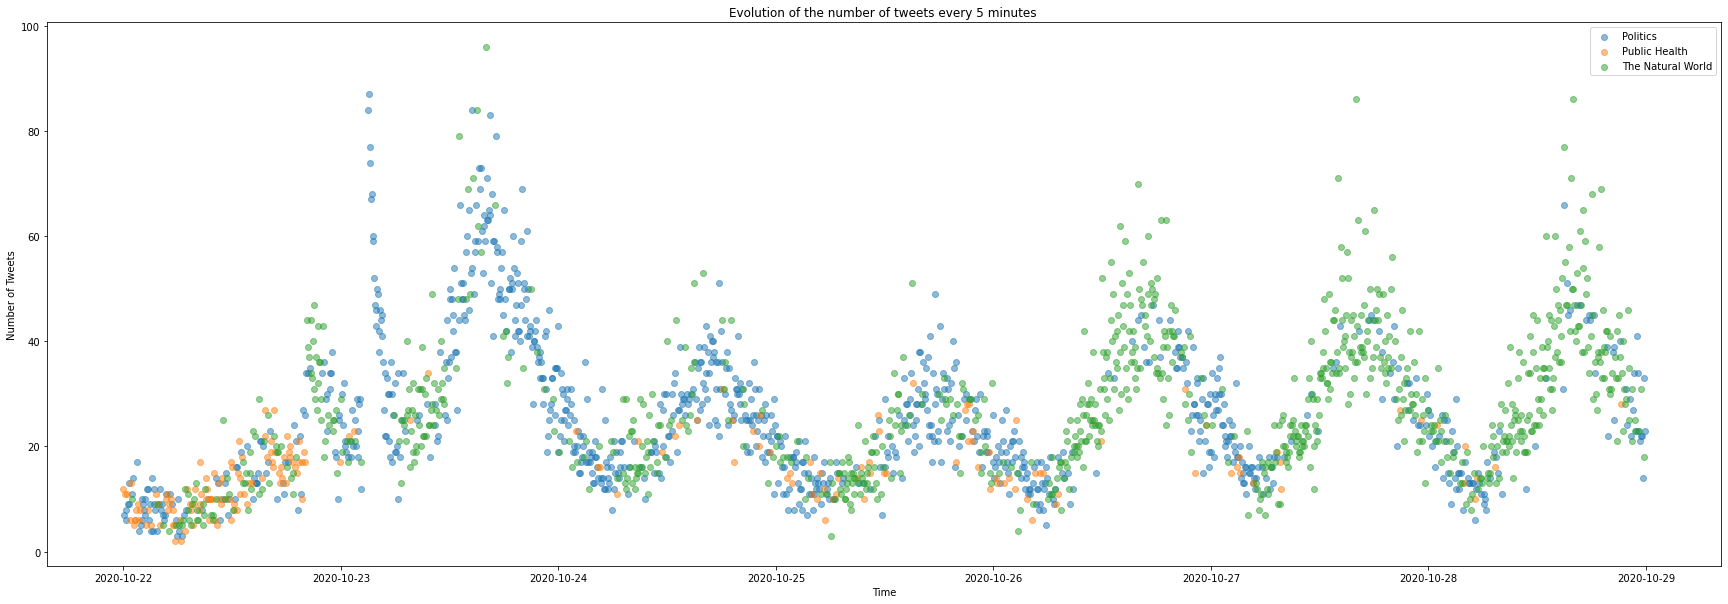

In [79]:
t1 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 0]
t2 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 1]
t3 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 2]
plt.figure(figsize = (30,10))
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.title('Evolution of the number of tweets every 5 minutes ')
plt.scatter(t1.index, t1['tweet','count'], label = 'Politics ', alpha=0.5)
plt.scatter(t2.index, t2['tweet','count'], label = 'Public Health', alpha = 0.5)
plt.scatter(t3.index, t3['tweet','count'], label = 'The Natural World', alpha = 0.5)
plt.legend()
plt.show()

# Results From Topic Modelling

After running the topic modelling we can now visualise which topics are being discussed at which points... At the point of the Presidential Debate, the Political Topic is the one which is being seen in the tweets. It should be noted that the Public Health topic is spoken about in the run up to the debate with the Natural World being spoken about a few days after the debate 

In [87]:
df_agg_nooutlier_lda_stock['sent_per_tweet'] = df_agg_nooutlier_lda_stock['sentiment_clean','sum']/df_agg_nooutlier_lda_stock['tweet','count'] 
df_agg_nooutlier_lda_stock['like_per_tweet'] = df_agg_nooutlier_lda_stock['likes','sum']/df_agg_nooutlier_lda_stock['tweet','count'] 
df_agg_nooutlier_lda_stock['retweet_per_tweet'] = df_agg_nooutlier_lda_stock['retweets','sum']/df_agg_nooutlier_lda_stock['tweet','count'] 
#Calculating metrics per tweets

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
df_agg_nooutlier_lda_stock['sent_tweet_scaled'] = (df_agg_nooutlier_lda_stock['sent_per_tweet']-df_agg_nooutlier_lda_stock['sent_per_tweet'].min())/(df_agg_nooutlier_lda_stock['sent_per_tweet'].max()-df_agg_nooutlier_lda_stock['sent_per_tweet'].min())
df_agg_nooutlier_lda_stock['like_tweet_scaled'] = (df_agg_nooutlier_lda_stock['like_per_tweet']-df_agg_nooutlier_lda_stock['like_per_tweet'].min())/(df_agg_nooutlier_lda_stock['like_per_tweet'].max()-df_agg_nooutlier_lda_stock['like_per_tweet'].min())
df_agg_nooutlier_lda_stock['retweet_tweet_scaled'] = (df_agg_nooutlier_lda_stock['retweet_per_tweet']-df_agg_nooutlier_lda_stock['retweet_per_tweet'].min())/(df_agg_nooutlier_lda_stock['retweet_per_tweet'].max()-df_agg_nooutlier_lda_stock['retweet_per_tweet'].min())
df_agg_nooutlier_lda_stock['count_tweet_scaled'] = (df_agg_nooutlier_lda_stock[('tweet','count')]-df_agg_nooutlier_lda_stock[('tweet','count')].min())/(df_agg_nooutlier_lda_stock[('tweet','count')].max()-df_agg_nooutlier_lda_stock[('tweet','count')].min())
df_agg_nooutlier_lda_stock['adj_scaled'] = (df_agg_nooutlier_lda_stock['Adj Close']-df_agg_nooutlier_lda_stock['Adj Close'].min())/(df_agg_nooutlier_lda_stock['Adj Close'].max()-df_agg_nooutlier_lda_stock['Adj Close'].min())


#Using Min-Max Scaling to Visualise the Features

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/armansarjou/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


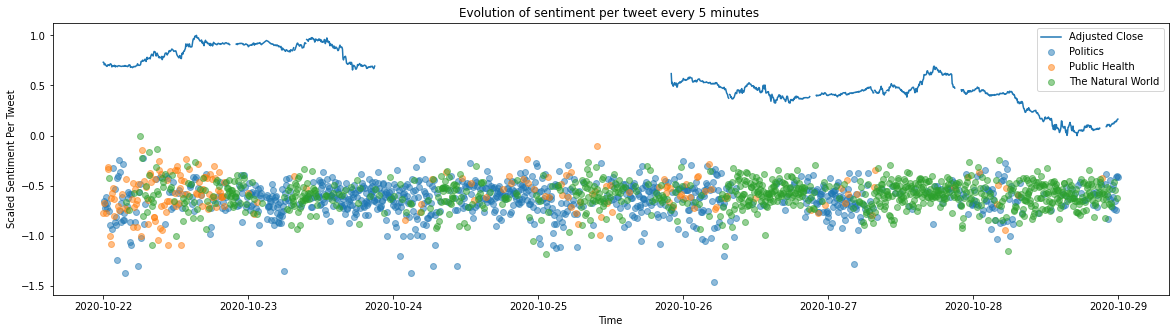

In [89]:
t1 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 0]
t2 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 1]
t3 = df_agg_nooutlier_lda_stock[df_agg_nooutlier_lda_stock['TOPIC'] == 2]
plt.figure(figsize = (20, 5))
plt.xlabel('Time')
plt.ylabel('Scaled Sentiment Per Tweet')
plt.title('Evolution of sentiment per tweet every 5 minutes ')
plt.scatter(t1.index, np.log(t1['sent_tweet_scaled']), label = 'Politics', alpha=0.5)
plt.scatter(t2.index, np.log(t2['sent_tweet_scaled']), label = 'Public Health', alpha = 0.5)
plt.scatter(t3.index, np.log(t3['sent_tweet_scaled']), label = 'The Natural World', alpha = 0.5)
plt.plot(df_agg_nooutlier_lda_stock.index, df_agg_nooutlier_lda_stock['adj_scaled'], label = 'Adjusted Close')
plt.legend()
plt.show()

No real big variations in the Sentiment per tweet... There are notably low values for sentiment for tweet at some intervals for the Political Group... These occur near the debate 

There's no real visual pattern that can be seen between the Adjusted Close for the Crude Oil Futures and the Sentiment Per Tweet.

The large gap in readings for the Crude Oil Futures is where trading has stopped as the Market is only open from Sunday to Friday 5am-6pm 

# Descriptive Statistics from Topics

In [105]:
plt.subplot(1, 3, 1)
plt.title('Politics')
boxplot = t1[['sent_tweet_scaled','count_tweet_scaled','adj_scaled']].boxplot(rot=90)

plt.subplot(1, 3, 2)
plt.title('Public Health')
boxplot2 = t2[['sent_tweet_scaled','count_tweet_scaled','adj_scaled']].boxplot(rot=90)

plt.subplot(1,3, 3)
plt.title('The Natural World')
boxplot3 = t3[['sent_tweet_scaled','count_tweet_scaled','adj_scaled']].boxplot(rot=90)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating these boxplots gives a better idea of the distribution of the sentiment per tweet for each Topic. All topics have very similar median values and and similar ranges with the Public Health topic having the highest interquartile range. The Natural World has many values which are considered outliers. This could be due to the smaller size of this topic. 

Descriptive Statistics should tell more about the topics

In [108]:
t1.describe()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(likes, sum)  (likes, std)  (likes, mean)  (retweets, sum)  \
count    943.000000    943.000000     943.000000       943.000000   
mean     237.761400     31.685421       9.004330        54.123012   
std      528.530454     90.468177      21.852285       134.744949   
min        3.000000      0.467099       0.272727         0.000000   
25%       43.000000      3.980870       2.171569         9.000000   
50%       92.000000      7.733202       3.727273        20.000000   
75%      216.000000     22.073938       7.500000        48.000000   
max     9733.000000   1199.272919     301.750000      2720.000000   

       (retweets, std)  (retweets, mean)  (sentiment_clean, sum)  \
count       943.000000        943.000000              943.000000   
mean          7.820104          2.123693                1.847770   
std          26.413128          6.195691                1.728248   
min           0.000000          0.000000               -4.653541   
25%           1.036836          0.416667                0.649154   
50%           2.192645          0.818182                1.614845   
75%           5.604432          1.716533                2.799039   
max         591.492064        129.523810                9.178660   

       (sentiment_clean, std)  (sentiment_clean, mean)  (tweet, count)  ...  \
count              943.000000               943.000000      943.000000  ...   
mean                 0.247065                 0.067823       26.412513  ...   
std                  0.057933                 0.058925       14.159935  ...   
min                  0.066252                -0.144926        3.000000  ...   
25%                  0.207078                 0.034006       16.000000  ...   
50%                  0.244841                 0.069495       23.000000  ...   
75%                  0.281943                 0.105354       34.000000  ...   
max                  0.448111                 0.252778       87.000000  ...   

        Adj Close        Volume  sent_per_tweet  like_per_tweet  \
count  556.000000    556.000000      943.000000      943.000000   
mean    39.476691    827.163669        0.067823        9.004330   
std      0.925569   1450.333303        0.058925       21.852285   
min     37.209999      0.000000       -0.144926        0.272727   
25%     38.730000    163.750000        0.034006        2.171569   
50%     39.445000    332.000000        0.069495        3.727273   
75%     40.432500    974.250000        0.105354        7.500000   
max     40.970001  20607.000000        0.252778      301.750000   

       retweet_per_tweet  sent_tweet_scaled  like_tweet_scaled  \
count         943.000000         943.000000         943.000000   
mean            2.123693           0.536991           0.007558   
std             6.195691           0.084683           0.018759   
min             0.000000           0.231244           0.000062   
25%             0.416667           0.488392           0.001693   
50%             0.818182           0.539394           0.003028   
75%             1.716533           0.590928           0.006267   
max           129.523810           0.802794           0.258867   

       retweet_tweet_scaled  count_tweet_scaled  adj_scaled  
count            943.000000          943.000000  556.000000  
mean               0.011071            0.259708    0.615126  
std                0.032297            0.150638    0.238549  
min                0.000000            0.010638    0.030928  
25%                0.002172            0.148936    0.422680  
50%                0.004265            0.223404    0.606958  
75%                0.008948            0.340426    0.861469  
max                0.675189            0.904255    1.000000  

[8 rows x 32 columns]

In [107]:
t2.describe()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(likes, sum)  (likes, std)  (likes, mean)  (retweets, sum)  \
count    187.000000    187.000000     187.000000       187.000000   
mean     157.962567     35.361301      12.639059        34.743316   
std      561.290711    166.154183      57.008409       120.039861   
min        1.000000      0.000000       0.411765         0.000000   
25%       23.000000      2.865455       1.723810         5.000000   
50%       51.000000      7.005045       3.500000        11.000000   
75%       99.000000     14.948609       6.645833        26.000000   
max     6365.000000   1659.122134     593.000000      1292.000000   

       (retweets, std)  (retweets, mean)  (sentiment_clean, sum)  \
count       187.000000        187.000000              187.000000   
mean          8.084453          2.852404                1.373931   
std          36.389694         13.415845                1.236981   
min           0.000000          0.000000               -1.835000   
25%           0.879703          0.366029                0.496438   
50%           1.878673          0.800000                1.153164   
75%           3.774995          1.620192                2.197754   
max         376.404924        153.666667                4.952778   

       (sentiment_clean, std)  (sentiment_clean, mean)  (tweet, count)  ...  \
count              187.000000               187.000000      187.000000  ...   
mean                 0.244551                 0.087305       14.764706  ...   
std                  0.076105                 0.075937        6.494682  ...   
min                  0.041759                -0.305833        2.000000  ...   
25%                  0.185882                 0.039723       10.000000  ...   
50%                  0.245222                 0.083799       14.000000  ...   
75%                  0.293013                 0.139406       19.000000  ...   
max                  0.469313                 0.324140       34.000000  ...   

        Adj Close       Volume  sent_per_tweet  like_per_tweet  \
count  136.000000   136.000000      187.000000      187.000000   
mean    39.921397   946.080882        0.087305       12.639059   
std      0.664562  1254.975821        0.075937       57.008409   
min     38.360001     6.000000       -0.305833        0.411765   
25%     39.627501   247.250000        0.039723        1.723810   
50%     40.065001   549.500000        0.083799        3.500000   
75%     40.539999  1053.500000        0.139406        6.645833   
max     40.910000  8277.000000        0.324140      593.000000   

       retweet_per_tweet  sent_tweet_scaled  like_tweet_scaled  \
count         187.000000         187.000000         187.000000   
mean            2.852404           0.564989           0.010678   
std            13.415845           0.109131           0.048939   
min             0.000000           0.000000           0.000182   
25%             0.366029           0.496609           0.001308   
50%             0.800000           0.559951           0.002833   
75%             1.620192           0.639865           0.005533   
max           153.666667           0.905351           0.508892   

       retweet_tweet_scaled  count_tweet_scaled  adj_scaled  
count            187.000000          187.000000  136.000000  
mean               0.014869            0.135795    0.729741  
std                0.069935            0.069092    0.171279  
min                0.000000            0.000000    0.327320  
25%                0.001908            0.085106    0.653995  
50%                0.004170            0.127660    0.766752  
75%                0.008446            0.180851    0.889175  
max                0.801043            0.340426    0.984536  

[8 rows x 32 columns]

In [106]:
t3.describe()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(likes, sum)  (likes, std)  (likes, mean)  (retweets, sum)  \
count    878.000000    878.000000     878.000000       878.000000   
mean     279.908884     37.840868      10.267202        68.405467   
std     1131.015255    231.258887      53.181023       216.299424   
min        1.000000      0.440959       0.200000         0.000000   
25%       59.000000      4.416749       2.478696        14.000000   
50%      112.500000      8.040427       4.031015        30.000000   
75%      205.000000     18.173978       6.703325        58.000000   
max    25693.000000   4935.427542    1165.083333      4145.000000   

       (retweets, std)  (retweets, mean)  (sentiment_clean, sum)  \
count       878.000000        878.000000              878.000000   
mean          9.254021          2.504335                2.427601   
std          42.393794          9.543673                1.782928   
min           0.000000          0.000000               -1.662992   
25%           1.281444          0.588235                1.105873   
50%           2.572973          1.067816                2.170560   
75%           5.765462          2.000000                3.532845   
max         796.307119        191.833333                9.931310   

       (sentiment_clean, std)  (sentiment_clean, mean)  (tweet, count)  ...  \
count              878.000000               878.000000      878.000000  ...   
mean                 0.241287                 0.083674       28.625285  ...   
std                  0.054935                 0.051961       13.758286  ...   
min                  0.092445                -0.092388        3.000000  ...   
25%                  0.206428                 0.053239       19.000000  ...   
50%                  0.238576                 0.082902       26.000000  ...   
75%                  0.273110                 0.114549       37.000000  ...   
max                  0.491128                 0.390000       96.000000  ...   

        Adj Close        Volume  sent_per_tweet  like_per_tweet  \
count  673.000000    673.000000      878.000000      878.000000   
mean    38.951233   1609.135215        0.083674       10.267202   
std      0.992849   1822.482791        0.051961       53.181023   
min     37.090000      0.000000       -0.092388        0.200000   
25%     38.490002    428.000000        0.053239        2.478696   
50%     38.830002   1034.000000        0.082902        4.031015   
75%     39.490002   2019.000000        0.114549        6.703325   
max     40.930000  13637.000000        0.390000     1165.083333   

       retweet_per_tweet  sent_tweet_scaled  like_tweet_scaled  \
count         878.000000         878.000000         878.000000   
mean            2.504335           0.559771           0.008642   
std             9.543673           0.074674           0.045654   
min             0.000000           0.306747           0.000000   
25%             0.588235           0.516032           0.001956   
50%             1.067816           0.558662           0.003289   
75%             2.000000           0.604142           0.005583   
max           191.833333           1.000000           1.000000   

       retweet_tweet_scaled  count_tweet_scaled  adj_scaled  
count            878.000000          878.000000  673.000000  
mean               0.013055            0.283248    0.479699  
std                0.049750            0.146365    0.255889  
min                0.000000            0.010638    0.000000  
25%                0.003066            0.180851    0.360825  
50%                0.005566            0.255319    0.448454  
75%                0.010426            0.372340    0.618557  
max                1.000000            1.000000    0.989690  

[8 rows x 32 columns]

t2 and t3 have very similar mean sentiment per tweet whereas t1 has a slightly lower mean sentiment per tweet with a smaller standard deviation

In [117]:
t1['sent_per_tweet'].kurtosis()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7417660936052339

In [118]:
t2['sent_per_tweet'].kurtosis()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.433537551805625

In [119]:
t3['sent_per_tweet'].kurtosis()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.0123930126738796

In [120]:
t1['sent_per_tweet'].skew()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.22297845222370397

In [121]:
t2['sent_per_tweet'].skew()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.5282733914485511

In [122]:
t3['sent_per_tweet'].skew()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.302283338379498

t3 has a similar mean to t2 but is actually positively skewed with slightly lower kurtosis values. t1 has very low kurtosis with negative skew.

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Normalized Histogram to show Sentiment Per Tweet Distributions')

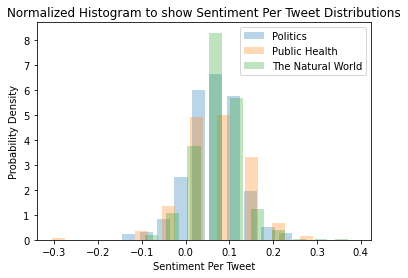

In [136]:
plt.hist(t1['sent_per_tweet'], alpha = 0.3, width = 0.03, density = True, label = 'Politics')
plt.hist(t2['sent_per_tweet'], alpha = 0.3, width = 0.03, density = True, label = 'Public Health')
plt.hist(t3['sent_per_tweet'], alpha = 0.3, width = 0.03, density = True, label = 'The Natural World')
plt.ylabel('Probability Density')
plt.xlabel('Sentiment Per Tweet')
plt.legend()
plt.title('Normalized Histogram to show Sentiment Per Tweet Distributions')

# Correlation Matrix In Preparation for Forecasting Crude Oil Futures

In [137]:
df_mat = df_agg_nooutlier_lda_stock
mat = df_mat.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(mat, annot=True)
plt.show()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This is hard to see so lets plot a slightly smalled correlation matrix

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


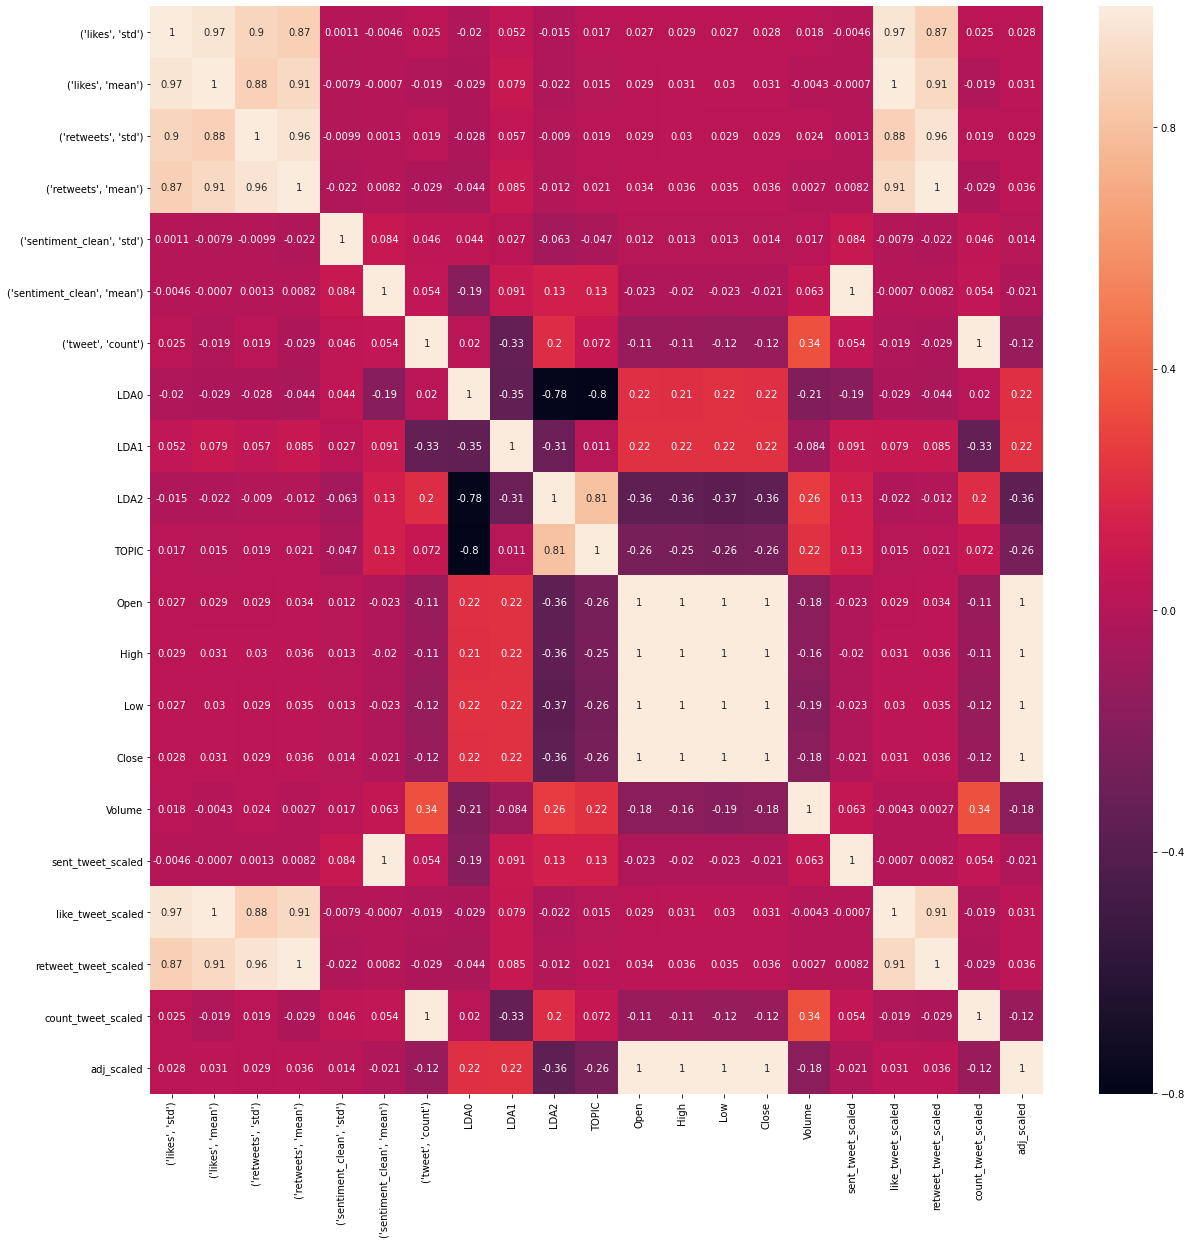

In [138]:
df_mat = df_agg_nooutlier_lda_stock.drop(columns=[('Latitude','mean'),('Latitude','std'),('Longitude','mean'),('Longitude','std'),('likes','sum'),('retweets','sum'),('sentiment_clean','sum'),('sent_per_tweet'),('like_per_tweet'),('retweet_per_tweet'),('Adj Close')])
mat = df_mat.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(mat, annot=True)
plt.show()

Topic 2 actually has the strongest correlation (negative correlation) with the adjusted close of the Crude Oil Futures... This could be due to people having the strongest reaction to the climate emergency when it is seen to cause personal health problems. No strong correlation between the twitter dataset and stock market data.



# Forecasting using Seasonal AutoRegressive Integrated Moving Average with Exogenous Regressors (SARIMAX) Modelling

The statsmodel API doesn't recognise a 5 minute interval, therefore data is resampled hourly and one-step forward predictions and forecasting will be done with hourly steps.

In [200]:
y = df_mat

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
y = y.resample('H').mean()
y.index

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2020-10-22 00:00:00', '2020-10-22 01:00:00',
               '2020-10-22 02:00:00', '2020-10-22 03:00:00',
               '2020-10-22 04:00:00', '2020-10-22 05:00:00',
               '2020-10-22 06:00:00', '2020-10-22 07:00:00',
               '2020-10-22 08:00:00', '2020-10-22 09:00:00',
               ...
               '2020-10-28 14:00:00', '2020-10-28 15:00:00',
               '2020-10-28 16:00:00', '2020-10-28 17:00:00',
               '2020-10-28 18:00:00', '2020-10-28 19:00:00',
               '2020-10-28 20:00:00', '2020-10-28 21:00:00',
               '2020-10-28 22:00:00', '2020-10-28 23:00:00'],
              dtype='datetime64[ns]', name='ts', length=168, freq='H')

In [202]:
sum(y.adj_scaled.isnull())
#null values in the adjusted close

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


53

In [203]:
y = y.fillna(0)

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Decomposition of the Relevant Time Series Data

In this section we decompose the Adjusted Close Price, the Sentiment Per Tweet and Tweet Count to prepare the data for forecasting

In [204]:
#taken from https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
decomposition = sm.tsa.seasonal_decompose(y.sent_tweet_scaled, model='additive')
fig = decomposition.plot()
plt.gcf().set_size_inches(20, 10)
plt.show()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
decomposition = sm.tsa.seasonal_decompose(y['count_tweet_scaled'], model='additive')
fig = decomposition.plot()
plt.gcf().set_size_inches(20, 10)
plt.show()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


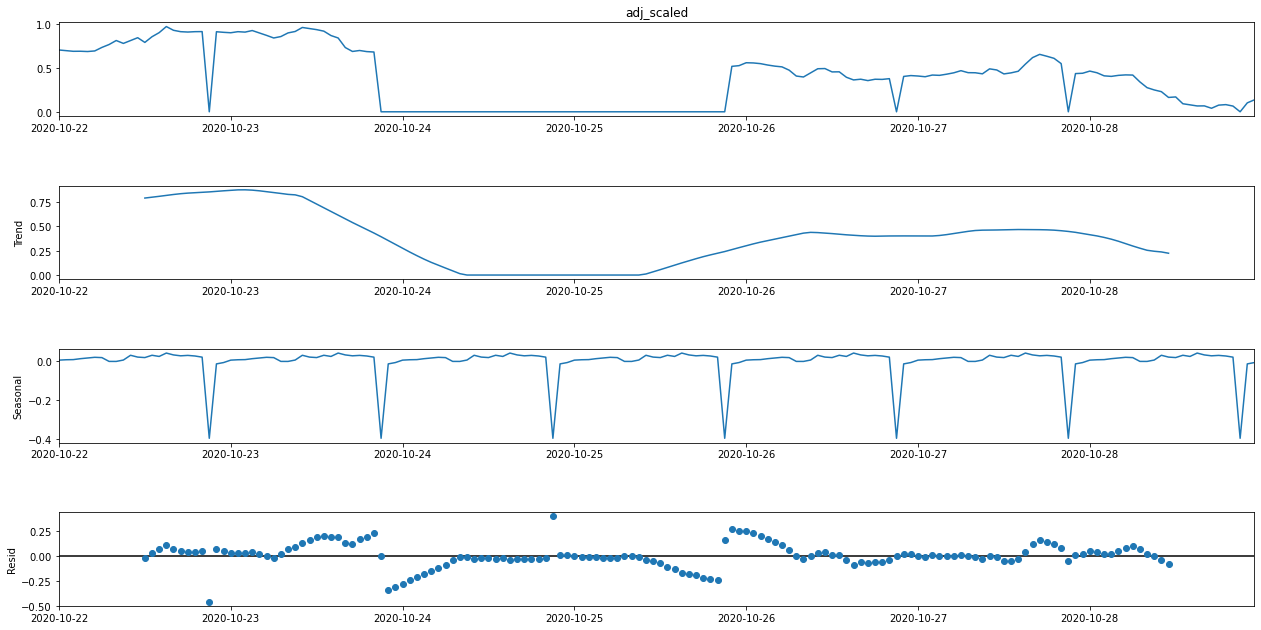

In [206]:
decomposition = sm.tsa.seasonal_decompose(y['adj_scaled'], model='additive')
fig = decomposition.plot()
plt.gcf().set_size_inches(20, 10)
plt.show()

This shows the strong seasonal aspect to all the time series data in this dataset. With SARIMAX we must select the order of seasonality and order of parameters. This will be chosen using a GridSearch method which looks for the lowest AIC value where AIC is the Akaike Information Criterion. 

# Splitting Data and Grid Search

In [207]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
y_train = y[:int(0.7*(len(y)))]
y_valid = y[int(0.7*(len(y))):]
#y_train['adj_scaled'] = y_train['adj_scaled'].replace(0,np.nan) 
#y_valid['adj_scaled'] = y_valid['adj_scaled'].replace(0,np.nan) 


print(y_train.shape)
print(y_valid.shape)

(117, 21)
(51, 21)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/
exog = y_train[['sent_tweet_scaled', 'count_tweet_scaled']]

p = range(0,2)
d = range(0,2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/


for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y_train.adj_scaled,
                                            exog = exog,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:111.55694371160702
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:87.44750529683789
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:55.23761758504432
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:81.67332045678775
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-114.04260307143116
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-32.24501220221018
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-92.01895136902316
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-135.31875674161805
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-117.9864530061384
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-39.521526536177255
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-95.0068488171621
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-134.85302581286572
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-125.46454505153031
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-39.740063363236104
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-100.33546379915836
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-130.9345495650996


The lowest absolute AIC is seen with the following parameters: ARIMA(0, 1, 0)x(0, 1, 0, 12)

In [167]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/


engog = y_train.adj_scaled
model = sm.tsa.SARIMAX(endog=engog, exog=exog,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[0])

                                     SARIMAX Results                                      
Dep. Variable:                         adj_scaled   No. Observations:                  117
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  15.922
Date:                            Sun, 20 Dec 2020   AIC                            -25.844
Time:                                    13:13:27   BIC                            -17.940
Sample:                                10-22-2020   HQIC                           -22.642
                                     - 10-26-2020                                         
Covariance Type:                              opg                                         


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


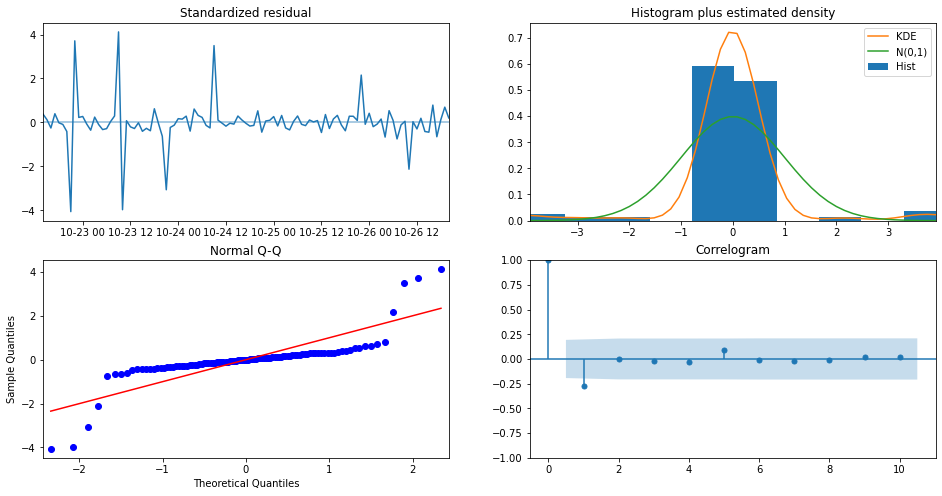

In [168]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

This plots the standardized residuals over time, the histogram and density of standardized resdiuals, a normal QQ plot and a correlogram. 

The variables have very little correlation and the standardised resiguals do not strongly represent a normal distribution as a result of having a very strong peak (positive kurtosis) in relation to a normal distribution



# Forecasting

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


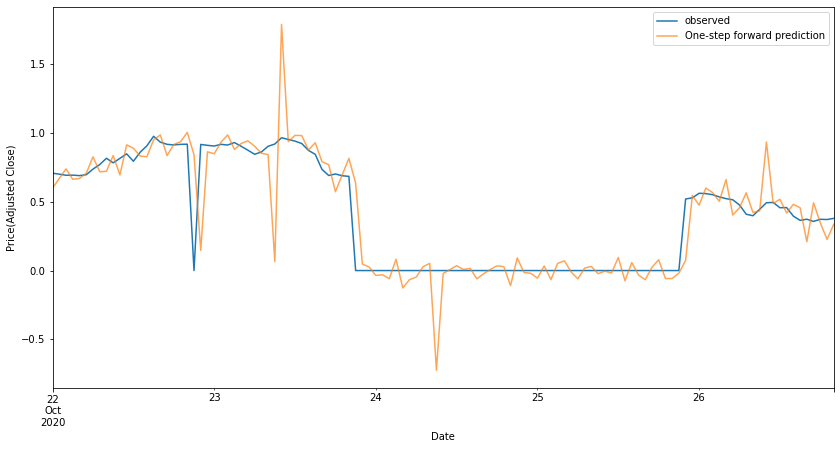

In [169]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

#Create one step forward prediction
pred = results.get_prediction(start=pd.to_datetime('2020-10-22'), dynamic=False, exog = exog)
#plot observed data
ax = y_train['adj_scaled'].plot(label='observed')
#Plot one step forward predicted mean datapoints
pred.predicted_mean.plot(ax=ax, label='One-step forward prediction', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Price(Adjusted Close)')
plt.legend()
plt.show()

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


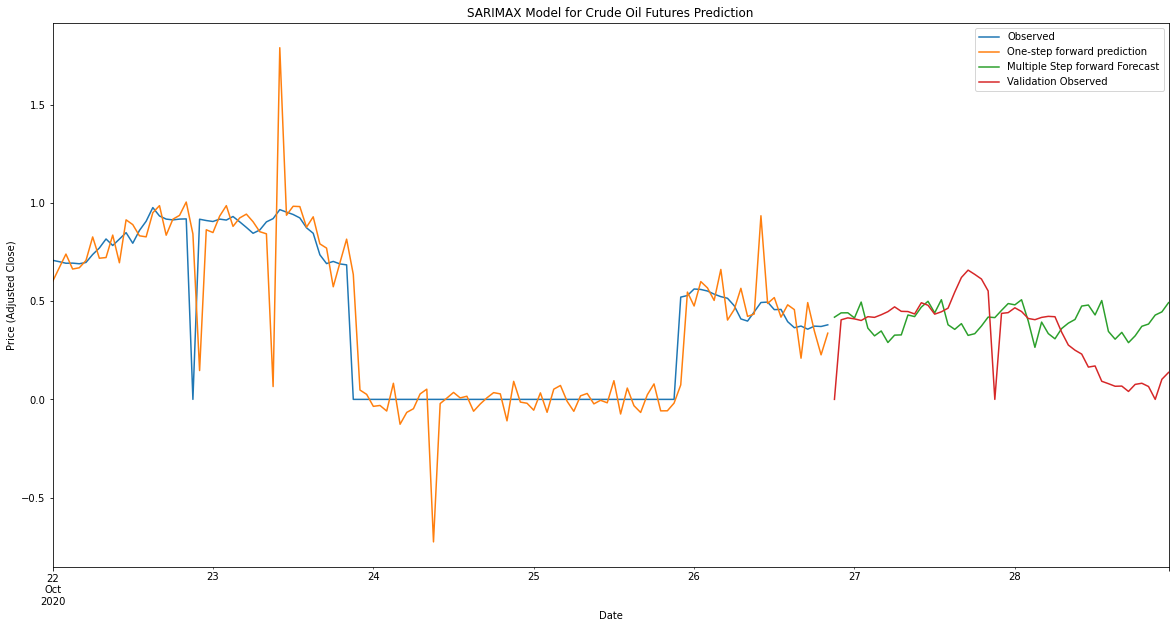

In [170]:
#Taken from https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

#use model to get one step forward predictoin
pred = results.get_prediction(start=pd.to_datetime('2020-10-22'), dynamic=False, exog = y_train[['sent_tweet_scaled', 'count_tweet_scaled']])
#get forecast for duration of validation data (51 steps ahead)
pred_uc = results.get_forecast(steps=51, exog=y_valid[['sent_tweet_scaled', 'count_tweet_scaled']])
#plot observed training data
ax = y_train.adj_scaled.plot(label='Observed')
#plot one step forward predicted mean datapoints 
pred.predicted_mean.plot(ax=ax, label='One-step forward prediction', figsize=(20, 10))
#plot multiple step forward forecast
pred_uc.predicted_mean.plot(ax=ax, label='Multiple Step forward Forecast')
#plot validation data observed datapoints
ax2 = y_valid.adj_scaled.plot(label='Validation Observed')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Adjusted Close)')
ax.set_title('SARIMAX Model for Crude Oil Futures Prediction')
plt.legend()
plt.show()

# Findings and Reflections on the SARIMAX one step forward predictions and multiple step forecasting

The one-step forward prediction is able to follow the general trend of the true data and can fairly effectively predict Crude Oil Futures within the next hour given previous data. 

Forecasting for multiple steps ahead does not work as well and the model does not deal with sharp changes in Crude Oil Future Adjusted Close price. The model is also unable to track where trading has ended for the day or weekend. most notably, the one step ahead prediction predicted a large spike on the 23rd October at around 3am (the time of the debate) probably due to spikes in the number of tweets per hour at this time. The increase seen in real life is not as pronounced as the model predicted. 

Other spikes in the one step ahead prediction, such as on the 26th of October are in line with increases observed in reality, but the observed increases are not as sharp.

In [152]:
pred_uc_df = pd.DataFrame(pred_uc.predicted_mean, columns = ['pred']) #save predictions into a dataframe

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
sm.tools.eval_measures.rmse(pred_uc_df['pred'], y_valid.adj_scaled) #calculate root mean square

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.20933732618264492

THE MSE on the testing is low which is a testament to the model being able to track the trend and seasonality of the Crude Oil Futures Adjusted Close Price

In [178]:
pred_df = pd.DataFrame(pred.predicted_mean, columns = ['pred']) #save predictions into a dataframe

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
sm.tools.eval_measures.rmse(pred_df['pred'], y_train.adj_scaled) #calculate root mean square

/Users/armansarjou/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.1959855571907538

The RMSE on the training data is quite close to that of the testing data and the small difference between the two indicates that the model generalises fairly well on this dataset.

It should be noted that in this context, if this model was used for decision making, it would results in a loss of capital as a result of the predicted forecast moving in the opposite direction to the observed data. In future, if this was done again, it would be more helpul to predict whether there will be an increase or decrease, rather than trying to forecast an exact price.

